In [11]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
import collections
from array import array

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'
outputdir = inputdir+'xsec_detsys_all_extra/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [12]:
outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"Detector_systematic.root","RECREATE");


In [13]:
#!jupyter nbconvert --to script numuCCana_muon_cut_weight.ipynb

In [14]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# CRTinBNB tagger, Overlay or MC

In [15]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'
f_cv = ROOT.TFile.Open(path+"xsec_detsys_CV_extra/xsec_detsys_CV.root", 'read')
f_sce = ROOT.TFile.Open(path+"xsec_detsys_SCE_extra/xsec_detsys_SCE.root", 'read')
f_lydown = ROOT.TFile.Open(path+"xsec_detsys_LYdown_extra/xsec_detsys_LYdown.root", 'read')
f_wireanglexz = ROOT.TFile.Open(path+"xsec_detsys_WireAngleXZ_extra/xsec_detsys_WireAngleXZ.root", 'read')
f_wireangleyz = ROOT.TFile.Open(path+"xsec_detsys_WireAngleYZ_extra/xsec_detsys_WireAngleYZ.root", 'read')
f_wiremodx = ROOT.TFile.Open(path+"xsec_detsys_WireModX_extra/xsec_detsys_WireModX.root", 'read')
f_wiremodyz = ROOT.TFile.Open(path+"xsec_detsys_WireModYZ_extra/xsec_detsys_WireModYZ.root", 'read')

f_lyatt = ROOT.TFile.Open(path+"xsec_detsys_LYAtt_extra/xsec_detsys_LYAtt.root", 'read')
f_lyray = ROOT.TFile.Open(path+"xsec_detsys_LYRay_extra/xsec_detsys_LYRayleigh.root", 'read')

f_dedx = ROOT.TFile.Open(path+"xsec_detsys_dEdx_extra/xsec_detsys_dEdx.root", 'read')
f_recomb2 = ROOT.TFile.Open(path+"xsec_detsys_recomb2_extra/xsec_detsys_recomb2.root", 'read')


In [16]:
pot_data =     7.644e+18 
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

def draw_adding_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .91,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/15.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [17]:
def plot_detsys_histo(name):
    #files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_dedx,f_recomb2]
    files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_recomb2]
    #name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh','dEdx', 'recomb2' ]
    name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh', 'recomb2' ]
    h_files = []
    i = 0
    legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
    for x in files:
        h_files.append(x.Get(name))
        h_files[i].SetLineColor(i+1)
        h_files[i].SetLineWidth(4)
        h_files[i].Scale(1.0/0.0638845208392)
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        if (i+1)==10:
            h_files[i].SetLineColor(30)
        legend.AddEntry(h_files[i],name_files[i],"f")
        if i == 0:
            h_files[i].SetMaximum(h_files[i].GetMaximum()*1.5)
            h_files[i].Draw('hist')
            legend.Draw()
        else:
            h_files[i].Draw("hist same")
        i+=1
    h_files[0].Draw("hist same")
    h_files[0].Draw("text same")
    c1.Draw()
    del h_files[:]

    c1.SaveAs(outputdir_png + 'h_'+name+'_WO_Scale.png')
    c1.SaveAs(outputdir_root + 'h_'+name+'_WO_Scale.root')
    c1.SaveAs(outputdir_pdf + 'h_'+name+'_WO_Scale.pdf')
    return

#h_files.clear()

In [21]:
def plot_detsys_histo_ratio(name):
    #files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_dedx,f_recomb2]
    files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_recomb2]
    #name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh','dEdx', 'recomb2' ]
    name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh', 'recomb2' ]
    h_files = []
    i = 0
    legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
    for x in files:
        h_files.append(x.Get(name))
        h_files[i].SetLineColor(i+1)
        h_files[i].SetLineWidth(4)
        h_files[i].Scale(1.0/0.0638845208392)
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        if (i+1)==10:
            h_files[i].SetLineColor(30)
        legend.AddEntry(h_files[i],name_files[i],"f")
        if i == 0:
            # do nothing
            h_files[i].Sumw2()
            test =  h_files[i].Clone()
            #h_files[i].SetMaximum(h_files[i].GetMaximum()*1.5)
            #h_files[i].Draw('hist')
            #legend.Draw()
        else:
            #h_files[i].Draw("hist same")
            t = h_files[0].Clone()
            #t.Divide(h_files[i])
            #h_files[i]=t.Clone()
            #print h_files[i].GetBinContent(1)#,h_files[i].GetBinContent(1),h_files[2].GetBinContent(3)
            del t
        i+=1
    i = 0
    #for x in files:
    print len(files)
    tot_bin_err = np.zeros((h_files[0].GetNbinsX()+1))
    for i in range(len(files)):
        if i == 0:
            # do nothing
            #t = h_files[0].Clone()
            #t.Divide(h_files[i])
            h_files[i].Divide(h_files[0])
            h_files[i].SetMaximum(2)
            h_files[i].SetMinimum(0)
            print h_files[i].GetBinContent(1)
            h_files[i].Draw('hist')
            legend.Draw()
            #del t
        else:
            for j in range(h_files[i].GetNbinsX()):
                h_files[i].SetBinContent(j+1,h_files[i].GetBinContent(j+1)/(test.GetBinContent(j+1)+1e-8))
                tot_bin_err[j] += math.pow(h_files[i].GetBinContent(j+1)-1,2)
            
            h_files[i].Draw("hist same")
            #print h_files[i].GetBinContent(1)#,h_files[i].GetBinContent(1),h_files[2].GetBinContent(3)
            #del t
        #i+=1
    for j in range(h_files[0].GetNbinsX()):
        h_files[0].SetBinError(j+1,math.sqrt(tot_bin_err[j]))
        

    h_files[0].Draw("E1 same")
    #h_files[0].Draw("text same")
    c1.Draw()
    del h_files[:]

    c1.SaveAs(outputdir_png + 'h_'+name+'_WO_Scale_ratio.png')
    c1.SaveAs(outputdir_root + 'h_'+name+'_WO_Scale_ratio.root')
    c1.SaveAs(outputdir_pdf + 'h_'+name+'_WO_Scale_ratio.pdf')
    return

#h_files.clear()

In [22]:
#h_files[0].Draw("hist")
#c1.Draw()

ploting:  TrackMom_MCS
10
1.0
ploting:  TrackMom_range
10
0.0
ploting:  NuVx_sce
10
0.0
ploting:  NuVy_sce
10
0.0
ploting:  NuVz_sce
10
0.0
ploting:  cosTheta
10
1.0
ploting:  TrackLength
10
0.0
ploting:  PID_chiproton
10
0.0
ploting:  PIDmupion_ration
10
1.0
ploting:  PIDmuprot_ration
10
1.0
ploting:  nr_crthit_top
10
1.0
ploting:  CRTVertexcut
10
1.0
ploting:  TrackScore
10
0.0
ploting:  NuScore
10
0.0


Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_TrackMom_MCS_sig_all_WO_Scale_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_TrackMom_MCS_sig_all_WO_Scale_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_TrackMom_MCS_sig_all_WO_Scale_ratio.pdf has been created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_TrackMom_range_sig_all_WO_Scale_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weig

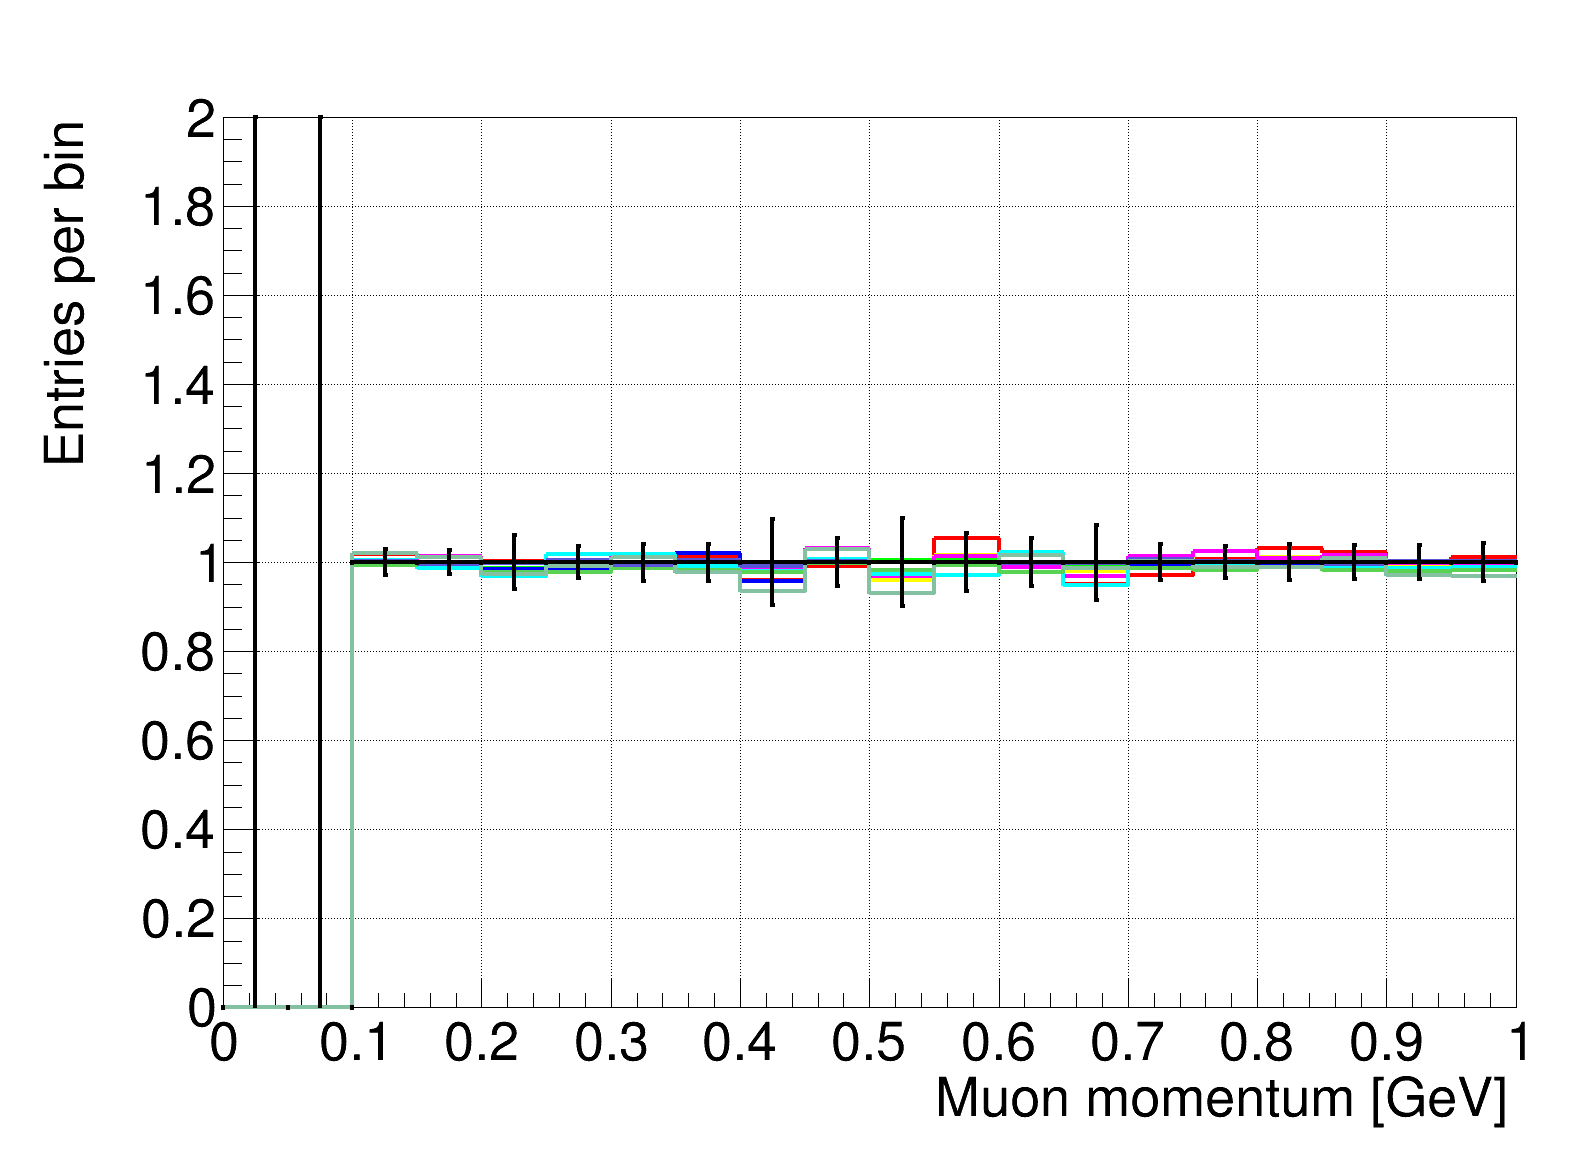

In [23]:

variable_list = ['TrackMom_MCS','TrackMom_range','NuVx_sce','NuVy_sce','NuVz_sce','cosTheta',\
                'TrackLength','PID_chiproton','PIDmupion_ration','PIDmuprot_ration','nr_crthit_top',\
                'CRTVertexcut','TrackScore','NuScore']
for y in variable_list:
    print 'ploting: ', y
    add_name = '_sig_all'
    #plot_detsys_histo(x+add_name)
    plot_detsys_histo_ratio(y+add_name)

ploting:  TrackMom_MCS
ploting:  TrackMom_range
ploting:  NuVx_sce
ploting:  NuVy_sce
ploting:  NuVz_sce
ploting:  cosTheta
ploting:  TrackLength
ploting:  PID_chiproton
ploting:  PIDmupion_ration
ploting:  PIDmuprot_ration
ploting:  nr_crthit_top
ploting:  CRTVertexcut
ploting:  TrackScore
ploting:  NuScore


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_TrackMom_MCS_bkg_all_WO_Scale.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_TrackMom_MCS_bkg_all_WO_Scale.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_TrackMom_MCS_bkg_all_WO_Scale.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_TrackMom_range_bkg_all_WO_Scale.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_TrackMom_range_bkg_all_WO_Scale.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35

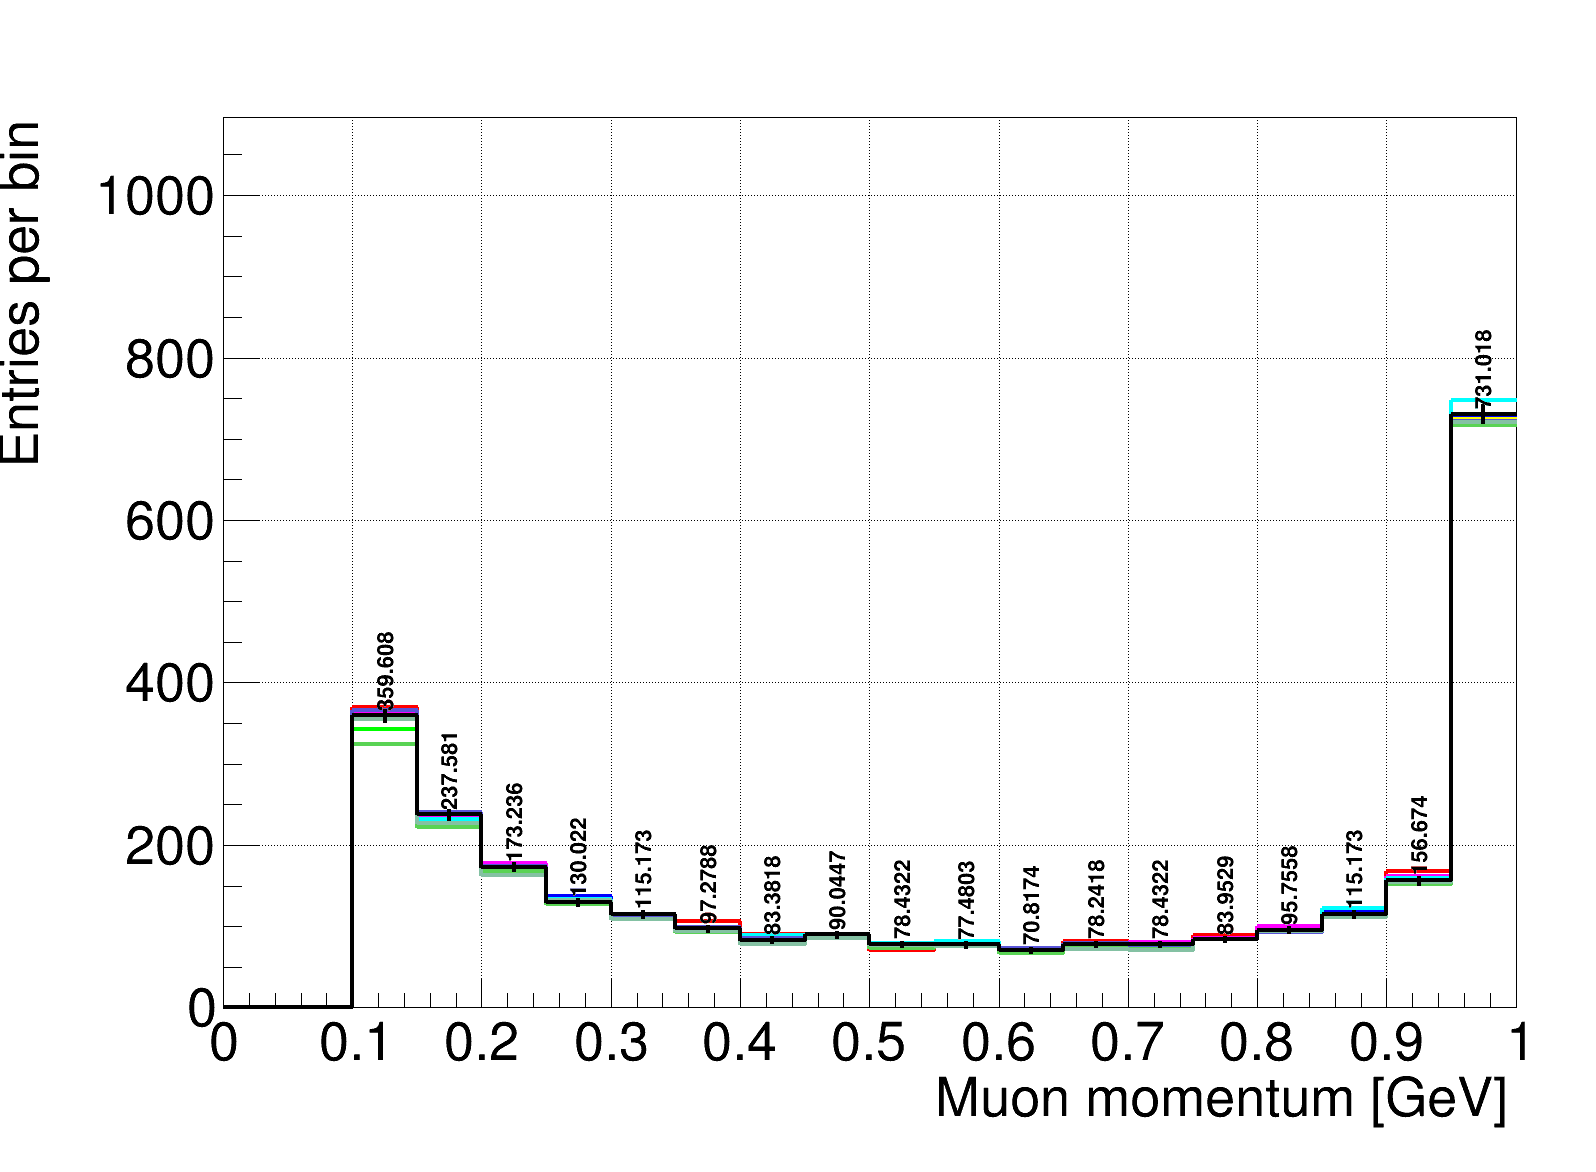

In [119]:

variable_list = ['TrackMom_MCS','TrackMom_range','NuVx_sce','NuVy_sce','NuVz_sce','cosTheta',\
                'TrackLength','PID_chiproton','PIDmupion_ration','PIDmuprot_ration','nr_crthit_top',\
                'CRTVertexcut','TrackScore','NuScore']
for x in variable_list:
    print 'ploting: ', x
    add_name = '_bkg_all'
    plot_detsys_histo(x+add_name)

ploting:  TrackMom_MCS
ploting:  TrackMom_range
ploting:  NuVx_sce
ploting:  NuVy_sce
ploting:  NuVz_sce
ploting:  cosTheta
ploting:  TrackLength
ploting:  PID_chiproton
ploting:  PIDmupion_ration
ploting:  PIDmuprot_ration
ploting:  nr_crthit_top
ploting:  CRTVertexcut
ploting:  TrackScore
ploting:  NuScore


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_TrackMom_MCS_bkg_pre_WO_Scale.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_TrackMom_MCS_bkg_pre_WO_Scale.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_TrackMom_MCS_bkg_pre_WO_Scale.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_TrackMom_range_bkg_pre_WO_Scale.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_TrackMom_range_bkg_pre_WO_Scale.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35

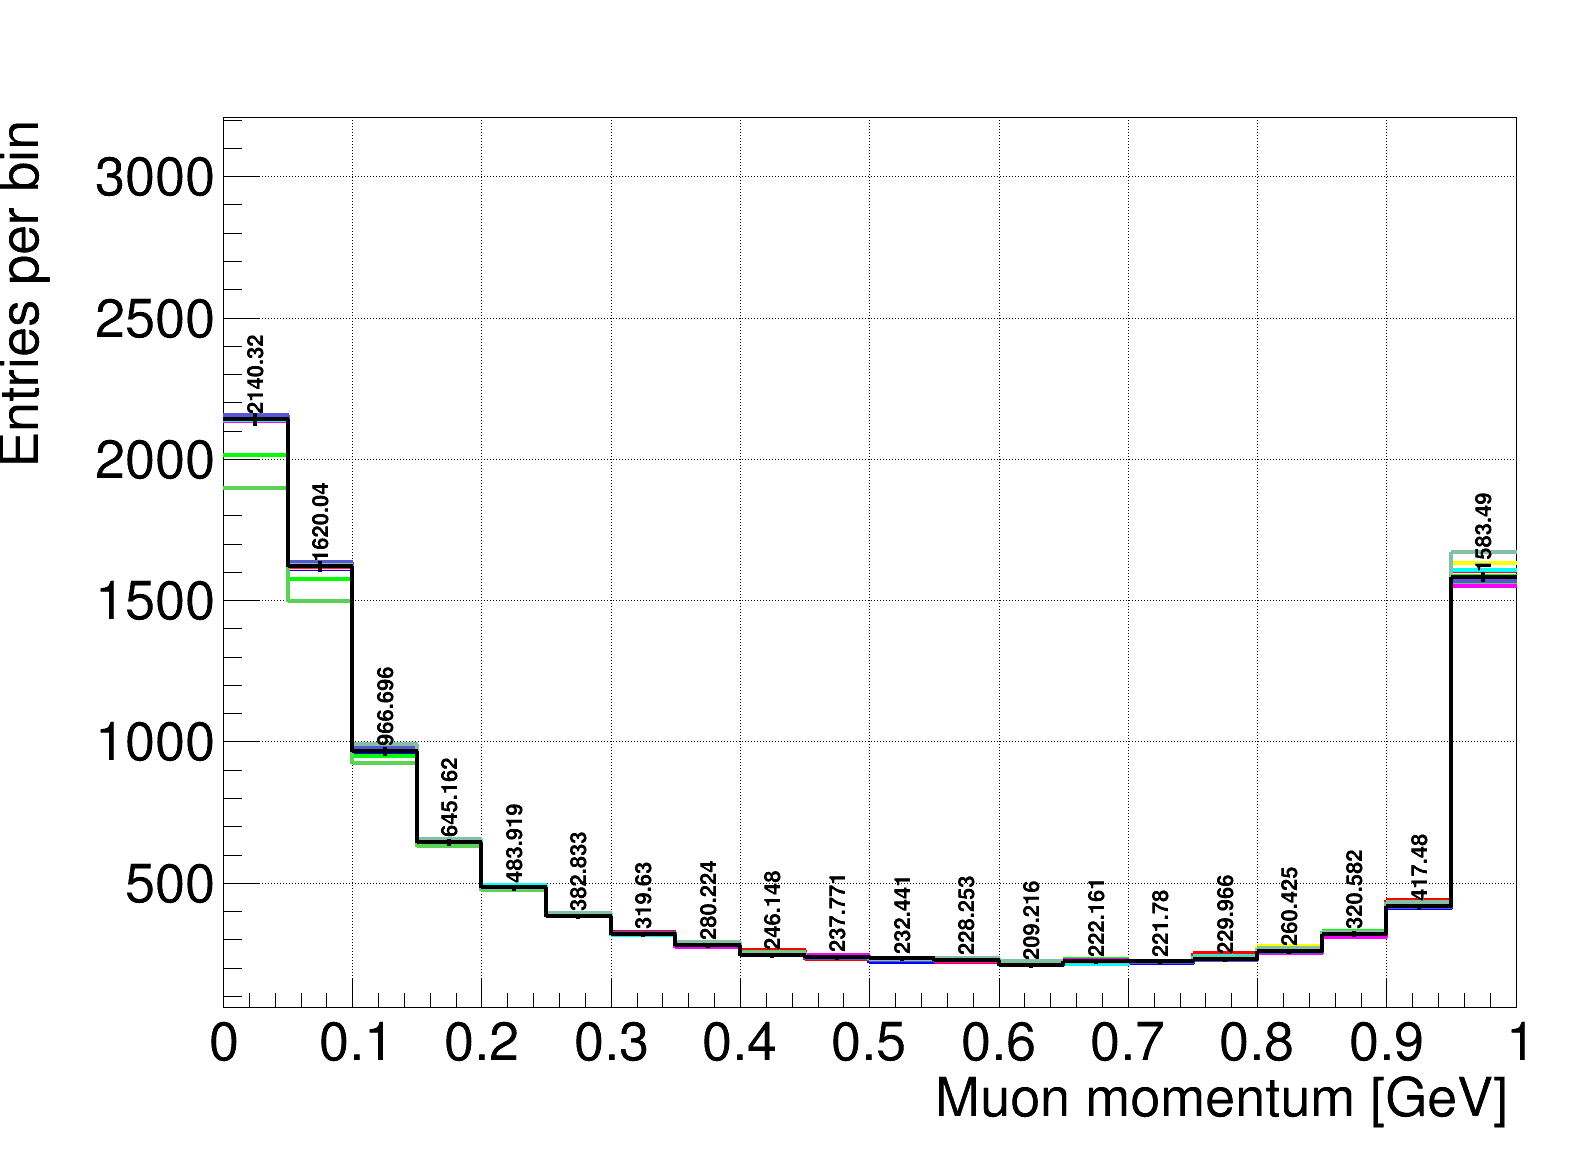

In [9]:
variable_list = ['TrackMom_MCS','TrackMom_range','NuVx_sce','NuVy_sce','NuVz_sce','cosTheta',\
                'TrackLength','PID_chiproton','PIDmupion_ration','PIDmuprot_ration','nr_crthit_top',\
                'CRTVertexcut','TrackScore','NuScore']
for x in variable_list:
    print 'ploting: ', x
    add_name = '_bkg_pre'
    plot_detsys_histo(x+add_name)

ploting:  TrackMom_MCS
ploting:  TrackMom_range
ploting:  NuVx_sce
ploting:  NuVy_sce
ploting:  NuVz_sce
ploting:  cosTheta
ploting:  TrackLength
ploting:  PID_chiproton
ploting:  PIDmupion_ration
ploting:  PIDmuprot_ration
ploting:  nr_crthit_top
ploting:  CRTVertexcut
ploting:  TrackScore
ploting:  NuScore


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_TrackMom_MCS_sig_all_WO_Scale.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_TrackMom_MCS_sig_all_WO_Scale.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_TrackMom_MCS_sig_all_WO_Scale.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_TrackMom_range_sig_all_WO_Scale.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_TrackMom_range_sig_all_WO_Scale.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35

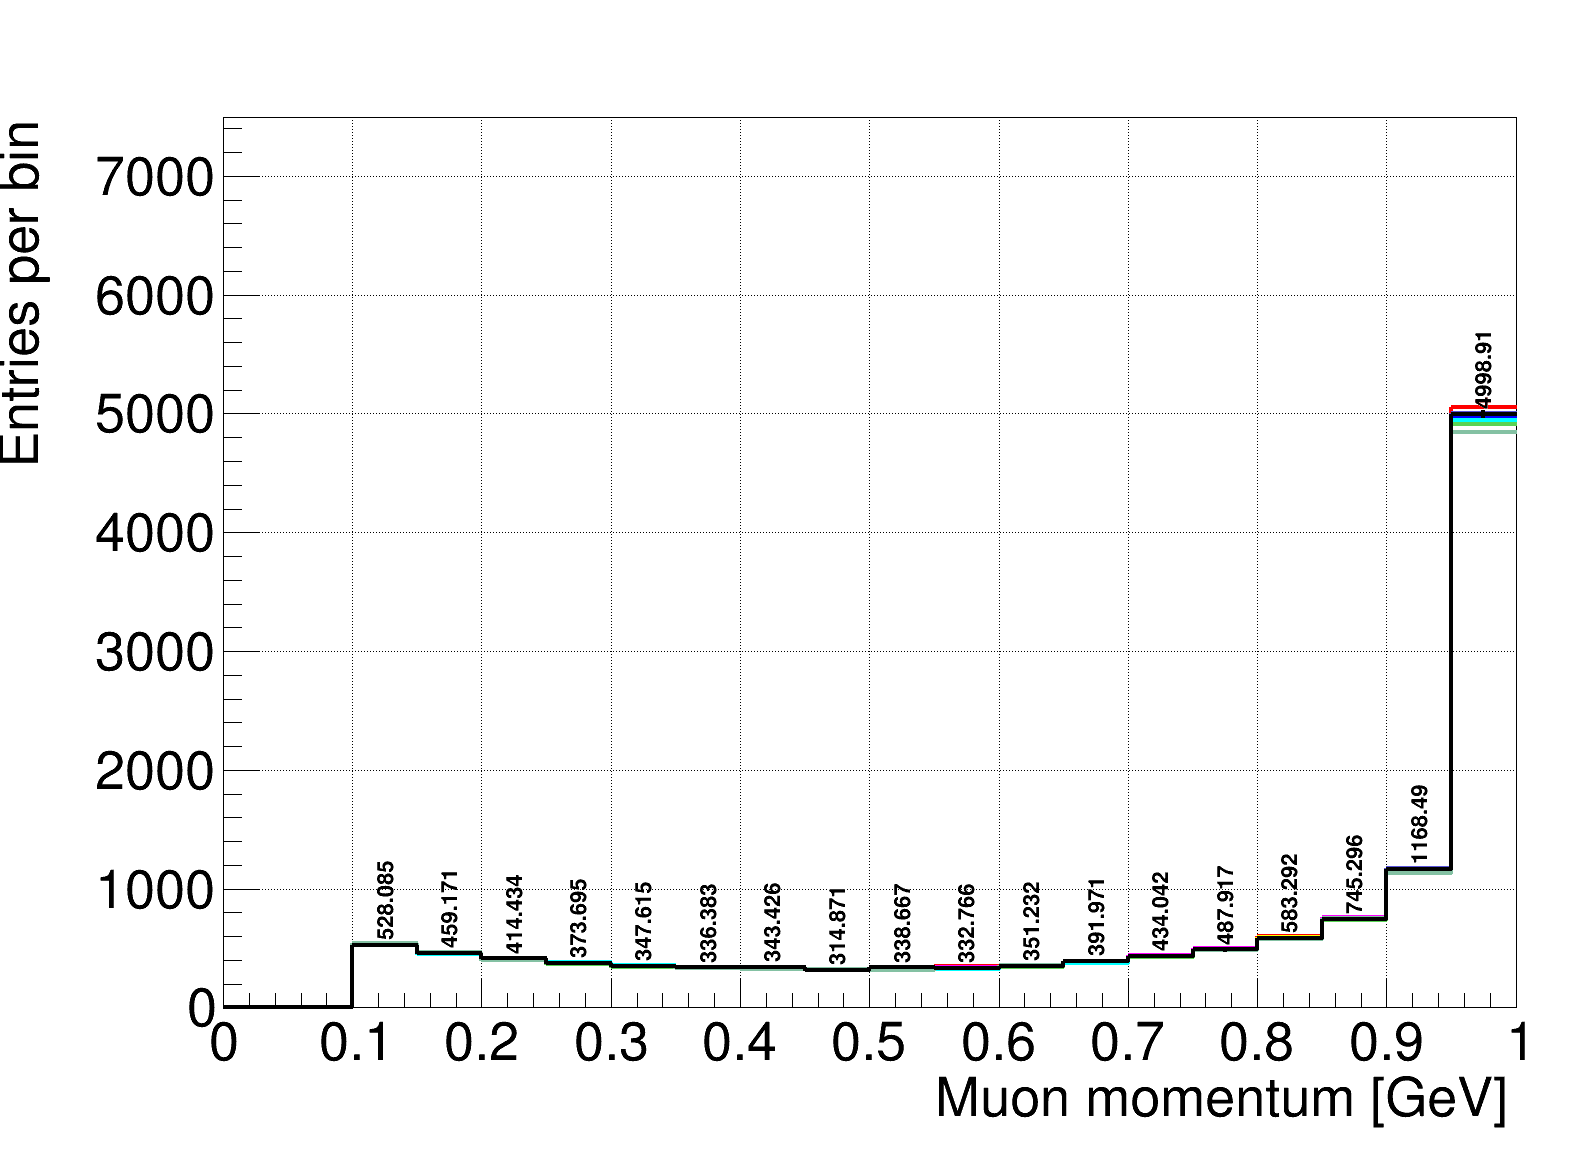

In [10]:
variable_list = ['TrackMom_MCS','TrackMom_range','NuVx_sce','NuVy_sce','NuVz_sce','cosTheta',\
                'TrackLength','PID_chiproton','PIDmupion_ration','PIDmuprot_ration','nr_crthit_top',\
                'CRTVertexcut','TrackScore','NuScore']
for x in variable_list:
    print 'ploting: ', x
    add_name = '_sig_all'
    plot_detsys_histo(x+add_name)

ploting:  TrackMom_MCS
ploting:  TrackMom_range
ploting:  NuVx_sce
ploting:  NuVy_sce
ploting:  NuVz_sce
ploting:  cosTheta
ploting:  TrackLength
ploting:  PID_chiproton
ploting:  PIDmupion_ration
ploting:  PIDmuprot_ration
ploting:  nr_crthit_top
ploting:  CRTVertexcut
ploting:  TrackScore
ploting:  NuScore


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_TrackMom_MCS_sig_pre_WO_Scale.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_TrackMom_MCS_sig_pre_WO_Scale.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_TrackMom_MCS_sig_pre_WO_Scale.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_TrackMom_range_sig_pre_WO_Scale.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_TrackMom_range_sig_pre_WO_Scale.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35

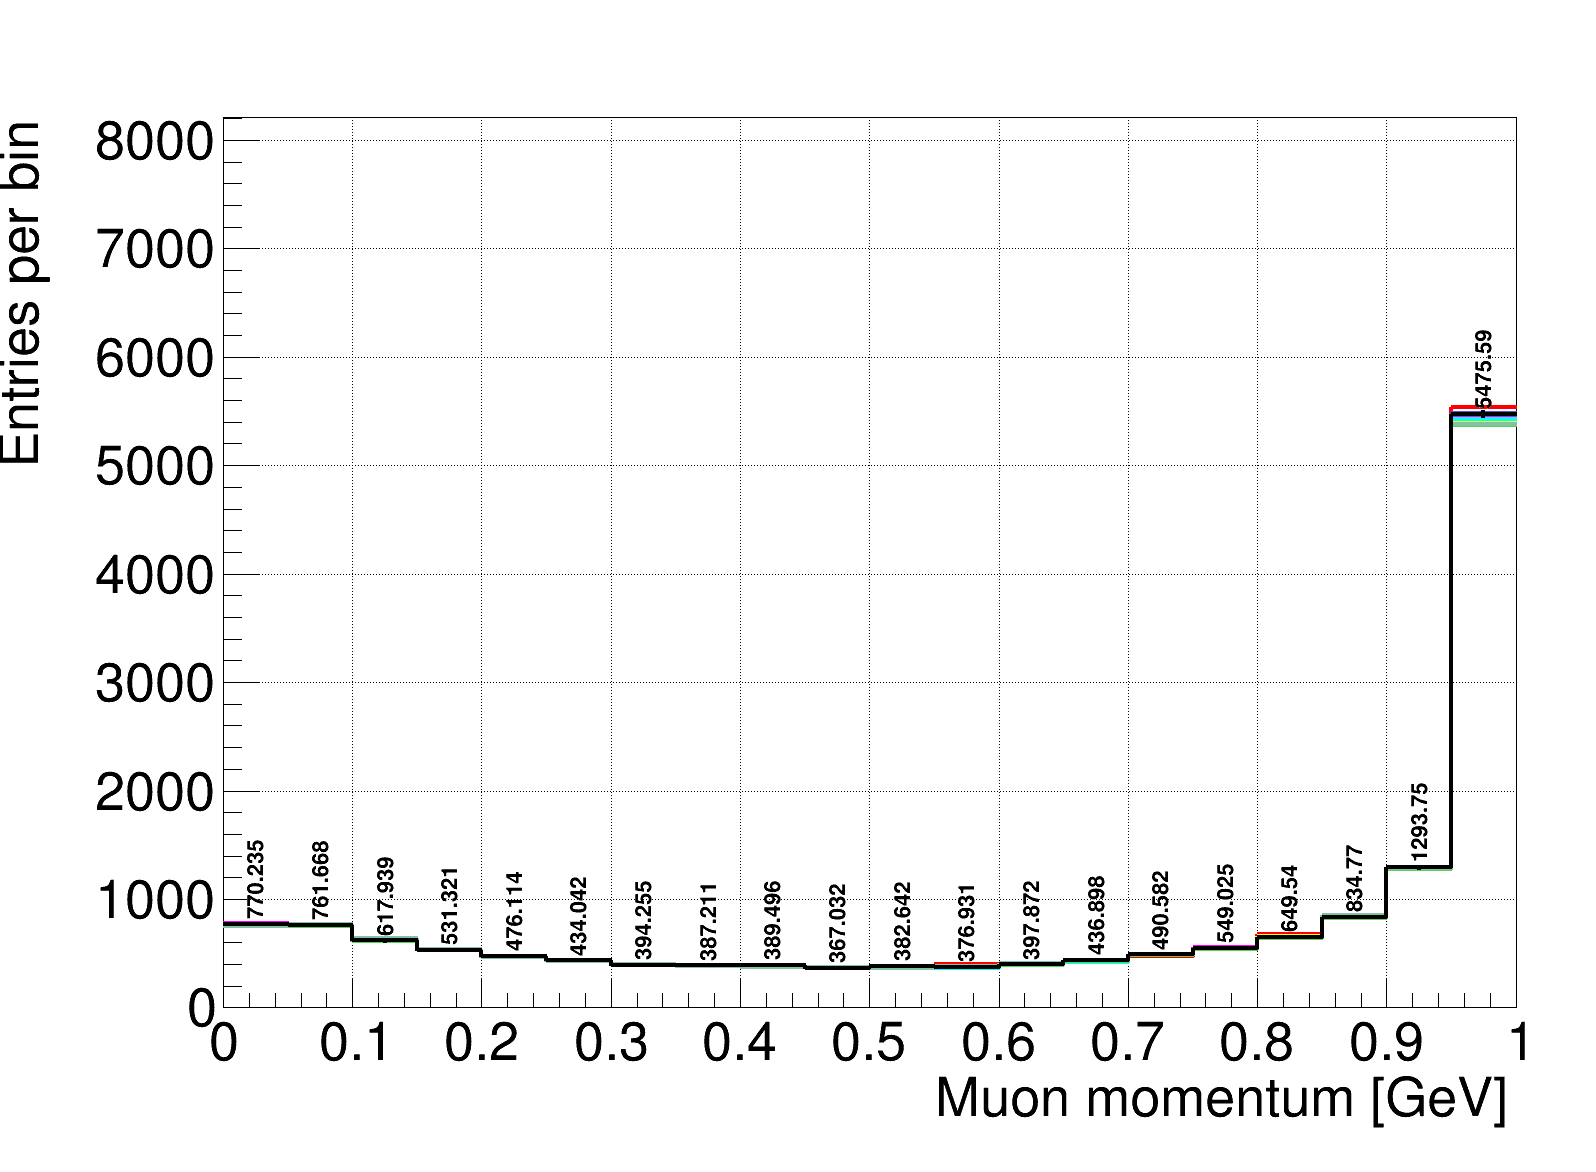

In [11]:
variable_list = ['TrackMom_MCS','TrackMom_range','NuVx_sce','NuVy_sce','NuVz_sce','cosTheta',\
                'TrackLength','PID_chiproton','PIDmupion_ration','PIDmuprot_ration','nr_crthit_top',\
                'CRTVertexcut','TrackScore','NuScore']
for x in variable_list:
    print 'ploting: ', x
    add_name = '_sig_pre'
    plot_detsys_histo(x+add_name)

Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_CV_extra/xsec_detsys_CV.root Title: 
Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_SCE_extra/xsec_detsys_SCE.root Title: 
Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_LYdown_extra/xsec_detsys_LYdown.root Title: 
Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireAngleXZ_extra/xsec_detsys_WireAngleXZ.root Title: 
Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireAngleYZ_extra/xsec_detsys_WireAngleYZ.root Title: 
Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/xsec_detsys_WireModX.root Title: 
Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModYZ_extra/xsec_detsys_WireModYZ.root Title: 
Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/x

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_xsec_detsys_all.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_xsec_detsys_all.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_xsec_detsys_all.pdf has been created


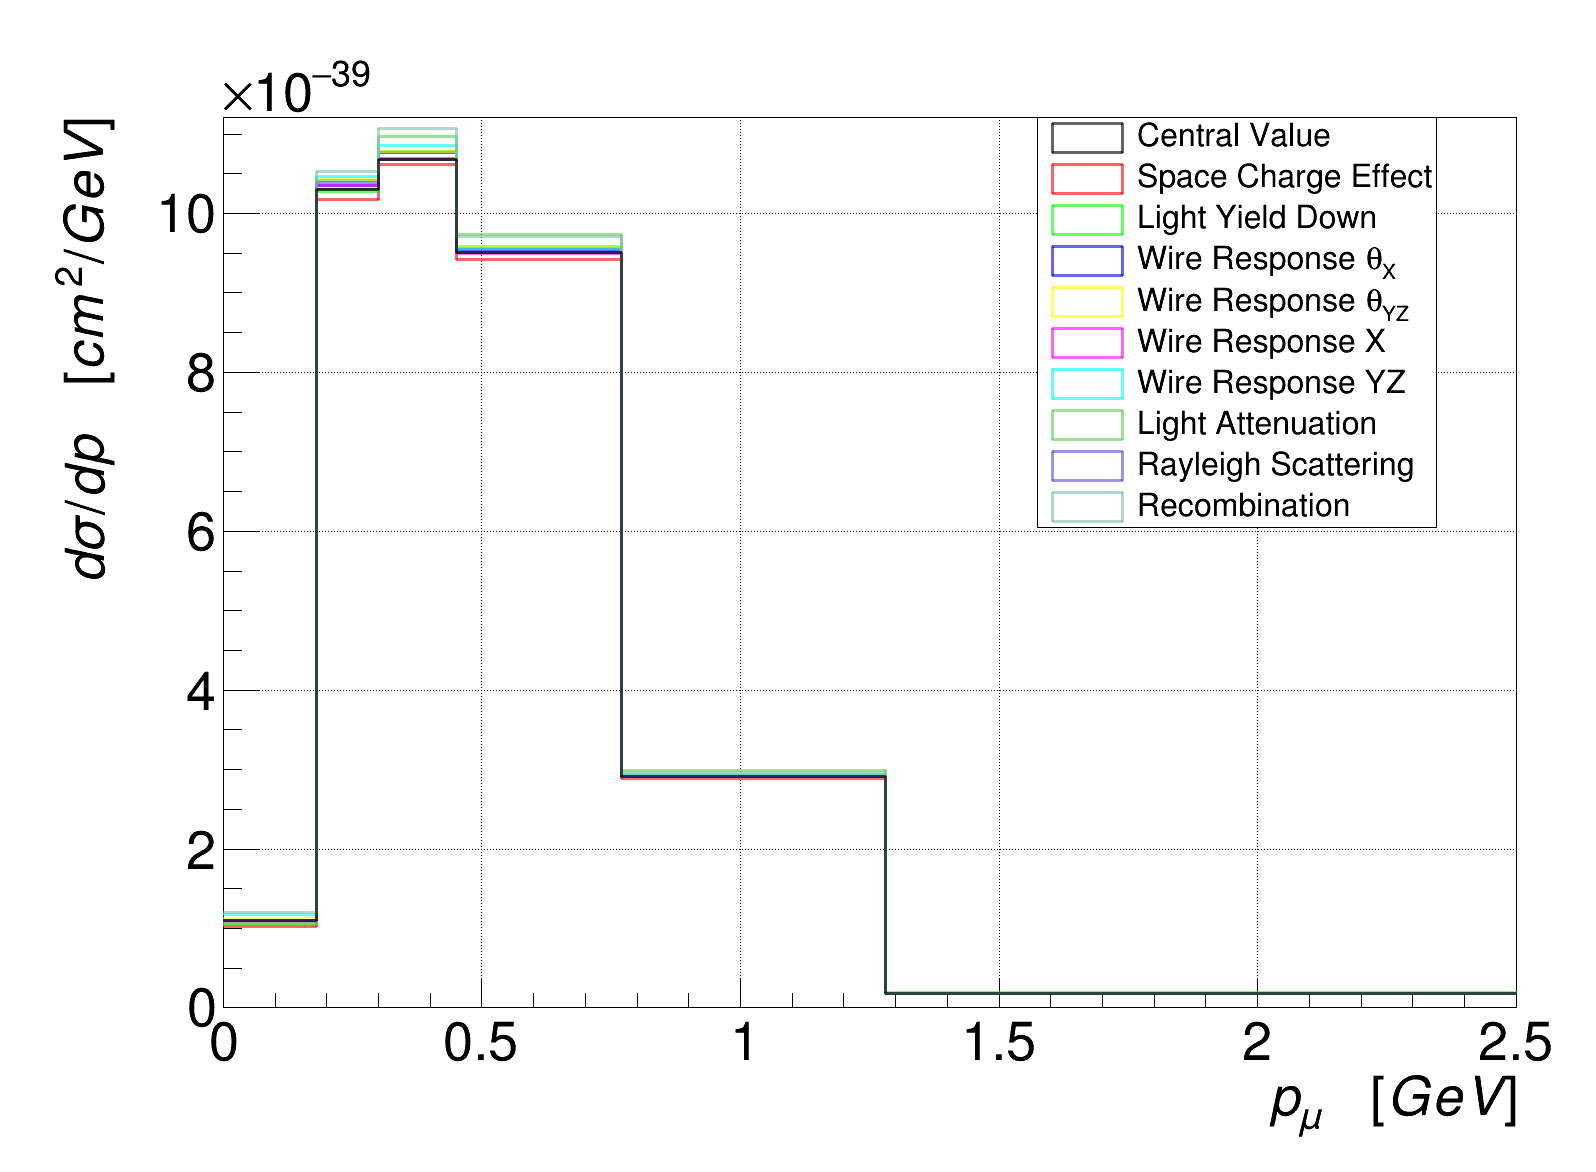

In [12]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_dedx,f_recomb2]
files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_recomb2]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh','dEdx', 'recomb2' ]
#name_files = ['Central Value','Space Charge Effect','Light Yield Down','Wire Response #theta_{X}','Wire Response #theta_{YZ}','Wire Response X','Wire Response YZ','Light Attenuation','Rayleigh Scattering','dEdx','Recombination']
name_files = ['Central Value','Space Charge Effect','Light Yield Down','Wire Response #theta_{X}','Wire Response #theta_{YZ}','Wire Response X','Wire Response YZ','Light Attenuation','Rayleigh Scattering','Recombination']

h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
for x in files:
    print x
    h_files.append(x.Get('h_xsec_data'))
    h_files[i].SetLineColorAlpha(i+1,0.6)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.6)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        h_files[i].Draw('hist')
    else:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        h_files[i].Draw("hist same")
    i+=1
h_files[0].Draw("hist same")
legend.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_all.png")
c1.SaveAs(outputdir_root + "h_xsec_detsys_all.root")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_all.pdf")

#h_files.clear()

In [13]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_dedx,f_recomb2]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh','dEdx', 'recomb2' ]
num_file = 11
h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
for x in files:
    h_files.append(x.Get('h_xsec_data'))
num_bins = h_files[0].GetNbinsX()

xsec_diff_matrix = np.zeros((num_bins))

xsec_cov_matrix = np.zeros((num_bins,num_bins))

for f in range(1,num_file-1):
    xsec_diff_matrix = np.zeros((num_bins))
    print name_files[f]
    for b in range(num_bins):
        xsec_diff_matrix[b]= (h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1) )/(h_files[0].GetBinContent(b+1) + 1e-100)
    #print np.matmul(xsec_diff_matrix,np.transpose(xsec_diff_matrix))
    xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(num_bins,1) * xsec_diff_matrix
np.save(output_filedir+'frac_covariance_detsys',xsec_cov_matrix)

Space Charge Effect
Light Yield Down
Wire Response #theta_{X}
Wire Response #theta_{YZ}
Wire Response X
Wire Response YZ
Light Attenuation
Rayleigh Scattering
Recombination


In [14]:
RootFile = ROOT.TFile(output_filedir+"Detector_systematic.root","RECREATE");

616

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_frac_covariance_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_frac_covariance_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_frac_covariance_detsys.pdf has been created


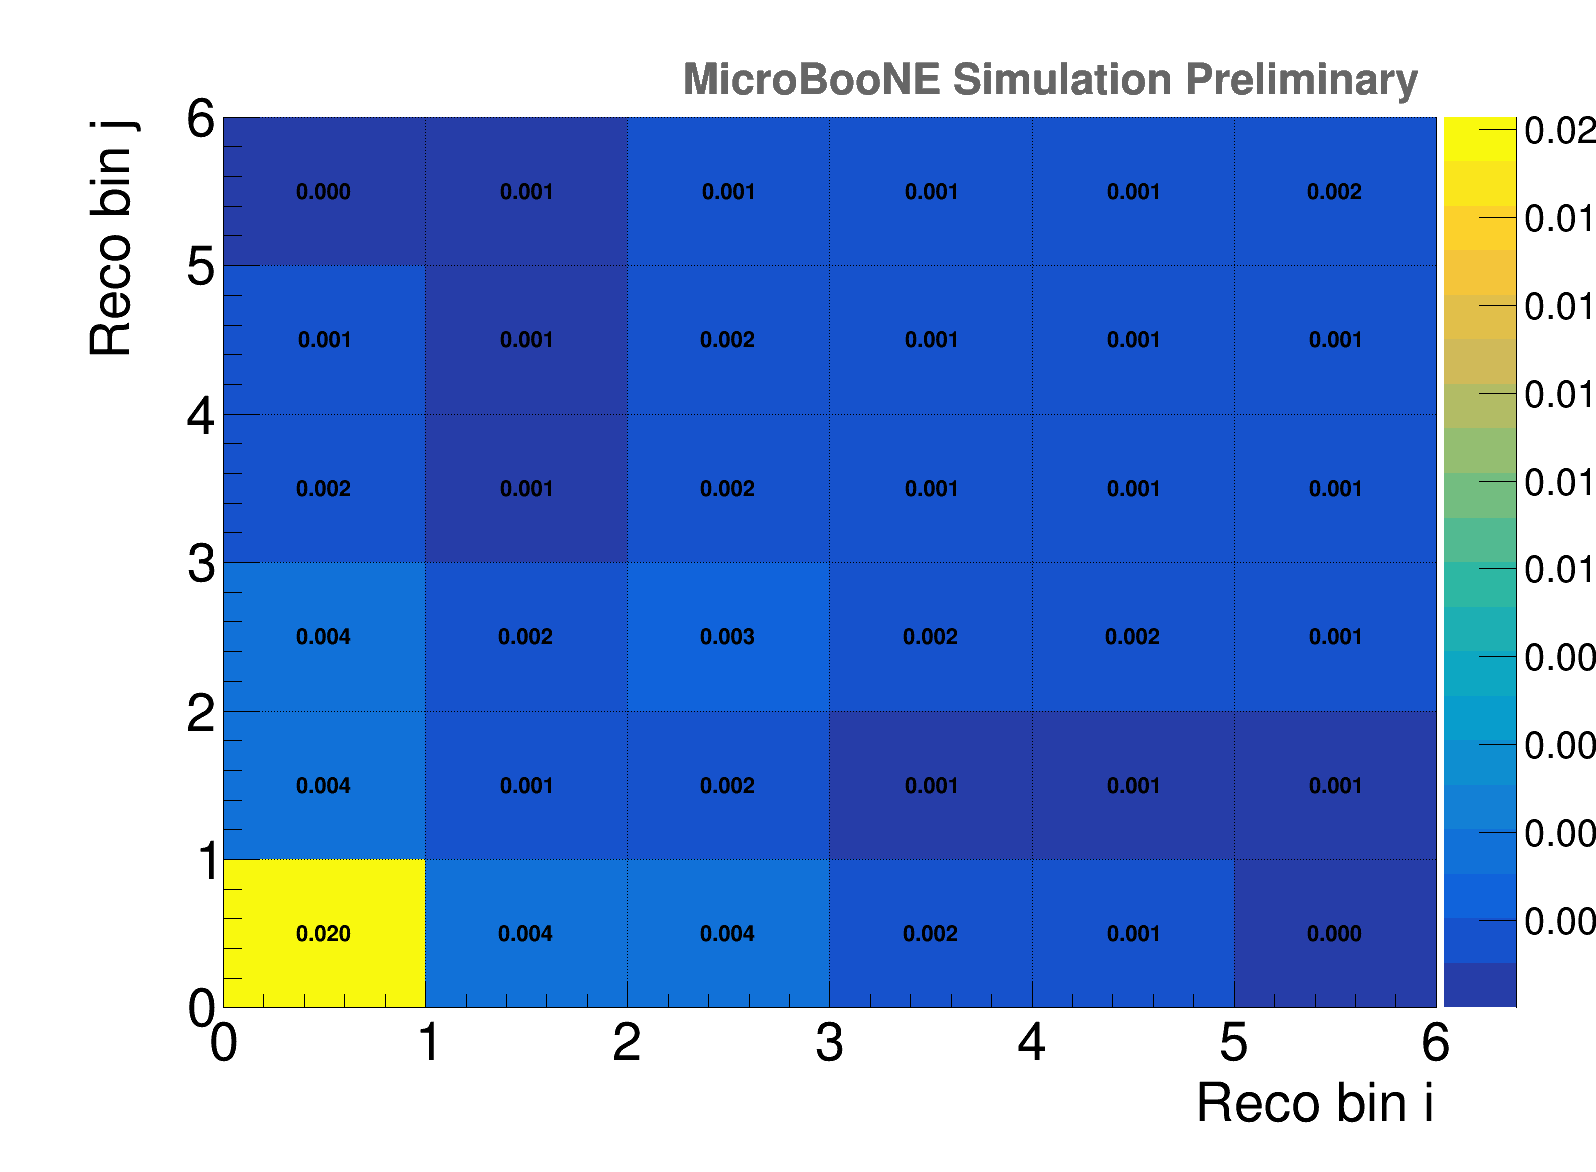

In [15]:
ROOT.gStyle.SetPaintTextFormat('0.6f')
h_covariance = ROOT.TH2F("h_covariance",'Covariance matrix',6,0,6,6,0,6)
for i in range(num_bins):
    for j in range(num_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_covariance.Draw('colz')
c1.SetLogz(0)
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_frac_covariance_detsys.png")
c1.SaveAs(outputdir_root + "h_frac_covariance_detsys.root")
c1.SaveAs(outputdir_pdf + "h_frac_covariance_detsys.pdf")
h_covariance.Write('h_frac_covariance')

In [16]:
quad_sum = 0.1
for i in range(num_bins):
    quad_sum = quad_sum+xsec_cov_matrix[i,i]
    print i, ' - ', xsec_cov_matrix[i,i], ' sqrt: ', math.sqrt(xsec_cov_matrix[i,i])
    
print 'Qad sum: ', quad_sum,' sqrt: ', math.sqrt(quad_sum)
print 'Qad sum: ', quad_sum/num_bins,' sqrt: ', math.sqrt(quad_sum/num_bins)
    

0  -  0.020289873485345097  sqrt:  0.142442526955
1  -  0.0012667463695499577  sqrt:  0.0355913805513
2  -  0.002622319472574875  sqrt:  0.0512085878791
3  -  0.0012067198816853978  sqrt:  0.0347378738797
4  -  0.0011793010358503969  sqrt:  0.0343409527511
5  -  0.0019350495450156247  sqrt:  0.0439891980492
Qad sum:  0.12850000979002138  sqrt:  0.358468980234
Qad sum:  0.021416668298336897  sqrt:  0.146344348365


In [17]:
quad_sum = 0.0
for f in range(1,num_file-1):
    for b in range(1):
        err = h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1)
        print err, err/h_files[0].GetBinContent(b+1)
        quad_sum = quad_sum + err*err
print quad_sum , quad_sum/h_files[0].GetBinContent(1)/h_files[0].GetBinContent(1)
print math.sqrt(quad_sum), math.sqrt(quad_sum)/h_files[0].GetBinContent(1)
print h_files[0].GetBinContent(1)

7.14269853236e-41 0.064979418255
5.2026008085e-41 0.0473297273317
2.58399436821e-42 0.00235074251083
-2.69679889459e-41 -0.0245336440461
7.18445722659e-42 0.00653593104829
-7.28675201449e-41 -0.0662899189606
3.36157488607e-41 0.0305813243451
-6.539859933e-42 -0.00594952022671
-9.71576277255e-41 -0.0883874084849
2.45161540867e-80 0.0202898734853
1.56576352259e-40 0.142442526955
1.09922475827e-39


In [18]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ' ,'LYAttenuation', 'LYRayleigh' ]
#num_file = 7
h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
for x in files:
    h_files.append(x.Get('h_xsec_data'))
num_bins = h_files[0].GetNbinsX()
xsec_diff_matrix = np.zeros((num_bins))
xsec_cov_matrix = np.zeros((num_bins,num_bins))
for f in range(1,num_file-1):
    xsec_diff_matrix = np.zeros((num_bins))
    for b in range(num_bins):
        xsec_diff_matrix[b]= (h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1) )
    #print np.matmul(xsec_diff_matrix,np.transpose(xsec_diff_matrix))
    xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(num_bins,1) * xsec_diff_matrix
    
xsec_corr_matrix = np.zeros((num_bins,num_bins))
for i in range(num_bins):
    for j in range(num_bins):
        xsec_corr_matrix[i][j] = xsec_cov_matrix[i][j]/(math.sqrt(xsec_cov_matrix[i][i]*xsec_cov_matrix[j][j]))

np.save(output_filedir+'correlation_detsys',xsec_corr_matrix)
np.save(output_filedir+'covariance_detsys',xsec_cov_matrix)

680

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_correlation_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_correlation_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_correlation_detsys.pdf has been created


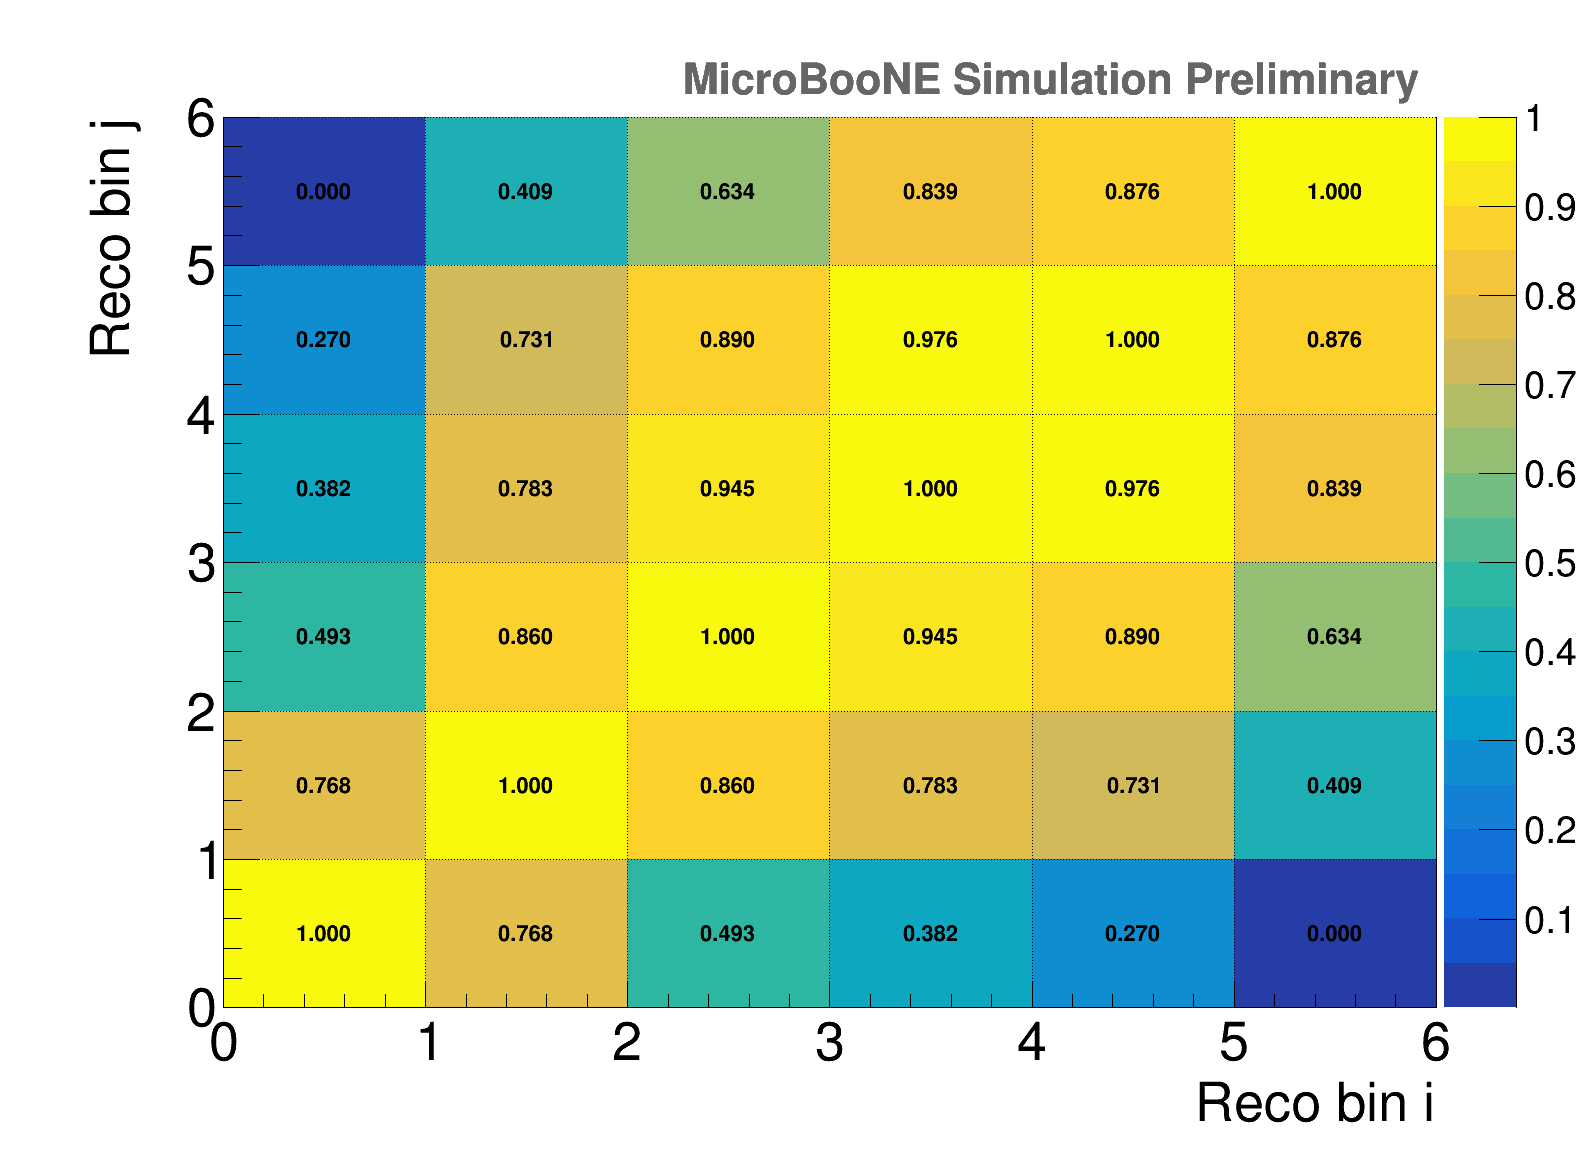

In [19]:
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation = ROOT.TH2D("h_correlation",'Correlation matrix',6,0,6,6,0,6)
for i in range(num_bins):
    for j in range(num_bins):
        h_correlation.SetBinContent(i+1,j+1,xsec_corr_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_correlation.SetXTitle("Reco bin i")
h_correlation.SetYTitle("Reco bin j")

h_correlation.GetYaxis().SetTitleSize(0.05)
h_correlation.GetYaxis().SetTitleOffset(0.0)
h_correlation.GetYaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleSize(0.05)
h_correlation.GetXaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleOffset(1)
h_correlation.SetLineColor(ROOT.kBlack)
h_correlation.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')

#h_correlation.SetMinimum(-1)
h_correlation.Draw('colz')
h_correlation.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_correlation_detsys.png")
c1.SaveAs(outputdir_root + "h_correlation_detsys.root")
c1.SaveAs(outputdir_pdf + "h_correlation_detsys.pdf")
h_correlation.Write('h_correlation')

663

Warning in <TFile::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_covariance_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_covariance_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_covariance_detsys.pdf has been created


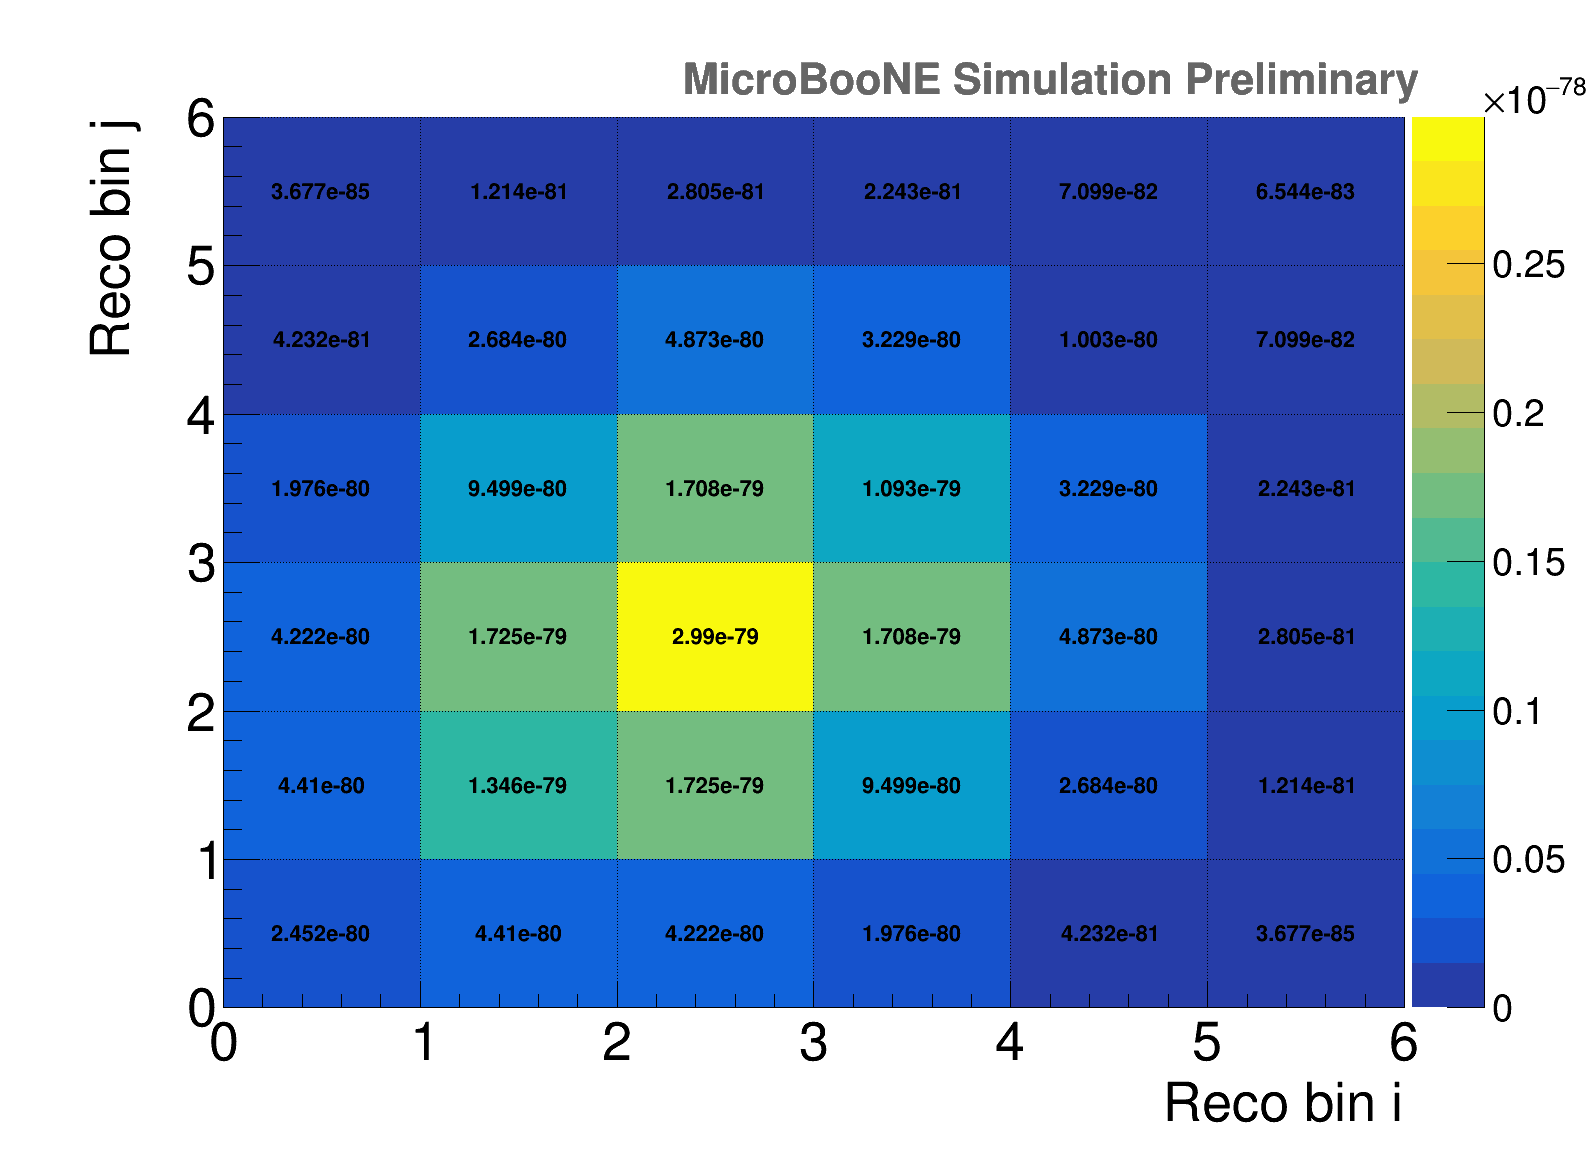

In [20]:
ROOT.gStyle.SetPaintTextFormat('0.6g')
h_covariance = ROOT.TH2D("h_covariance",'Covariance matrix',6,0,6,6,0,6)
for i in range(num_bins):
    for j in range(num_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")

h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.4g')

h_covariance.Draw('colz')
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_covariance_detsys.png")
c1.SaveAs(outputdir_root + "h_covariance_detsys.root")
c1.SaveAs(outputdir_pdf + "h_covariance_detsys.pdf")
h_covariance.Write('h_covariance')

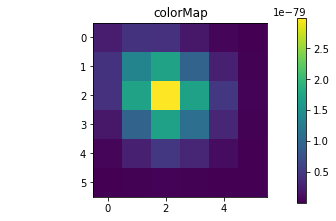

In [21]:
fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(xsec_cov_matrix)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show() 

In [22]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_eff_tilde_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_eff_tilde_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_eff_tilde_detsys.pdf has been created


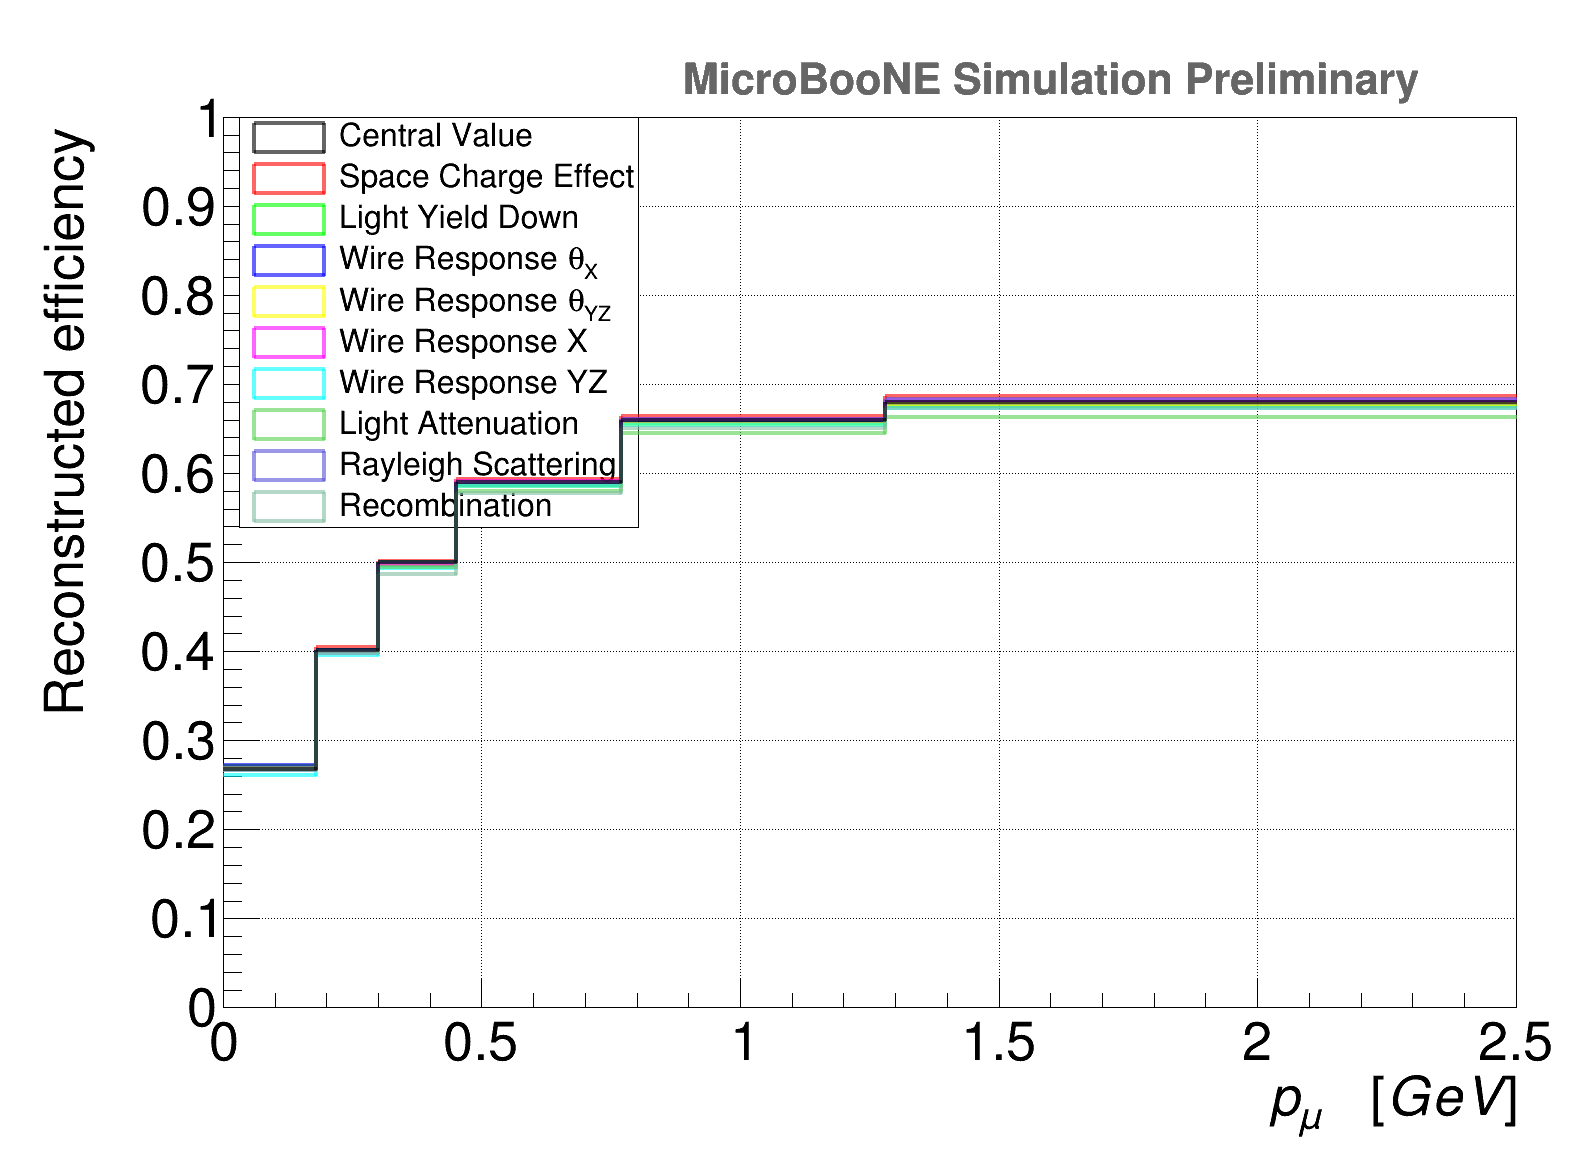

In [23]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
del h_files[:]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.4,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_eff_tilde'))
    h_files[i].SetLineColorAlpha(i+1,0.6)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.6)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetYTitle("Reconstructed efficiency")
        h_files[i].SetXTitle("p_{\mu} \t [GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].SetYTitle("Reconstructed efficiency")
        h_files[i].SetXTitle("p_{\mu} \t [GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw("hist same")
    i+=1
h_files[0].Draw("hist same")
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_detsys.png")
c1.SaveAs(outputdir_root + "h_eff_tilde_detsys.root")
c1.SaveAs(outputdir_pdf + "h_eff_tilde_detsys.pdf")

In [24]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_eff_true_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_eff_true_detsys.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_eff_true_detsys.root has been created


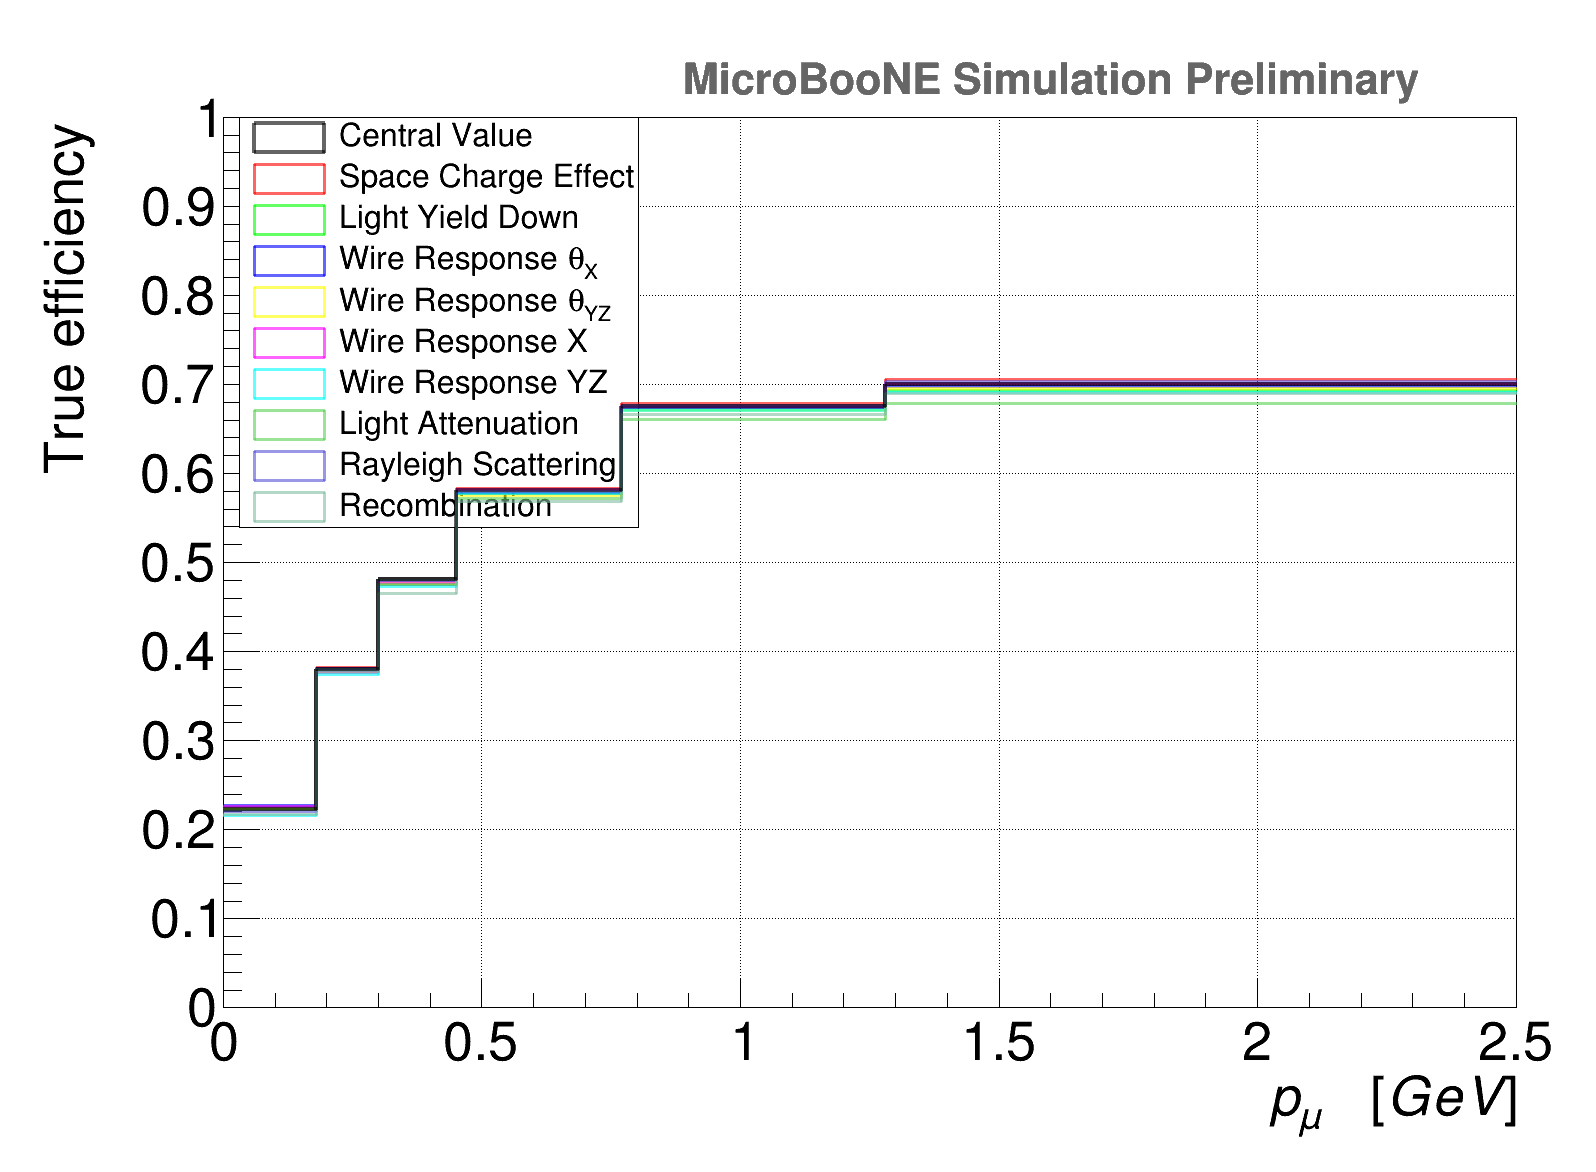

In [25]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
#del h_files_z[:]
#del h_files_n[:]
del h_files[:]
h_files_z = []
h_files_n = []
h_files = []

i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.4,0.9) # LEGEND LEFT
for x in files:
    h_files_z.append(x.Get('h_eff_true_energy_z'))
    h_files_n.append(x.Get('h_eff_true_energy_n'))
    h_files.append(h_files_z[i])
    h_files[i].Divide(h_files_n[i])
    h_files[i].SetLineColorAlpha(i+1,0.6)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.6)
    h_files[i].SetLineWidth(3)
    h_files[i].SetMaximum(1)
    h_files[i].SetMinimum(0)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetYTitle("True efficiency")
        h_files[i].SetXTitle("p_{\mu} \t [GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
        h_files[i].SetYTitle("Reconstructed efficiency")
        h_files[i].SetXTitle("p_{\mu} \t [GeV]")
    i+=1
h_files[0].Draw("hist same")
#legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_true_detsys.png")
c1.SaveAs(outputdir_pdf + "h_eff_true_detsys.pdf")
c1.SaveAs(outputdir_root + "h_eff_true_detsys.root")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_eff_both_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_eff_both_detsys.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_eff_both_detsys.root has been created


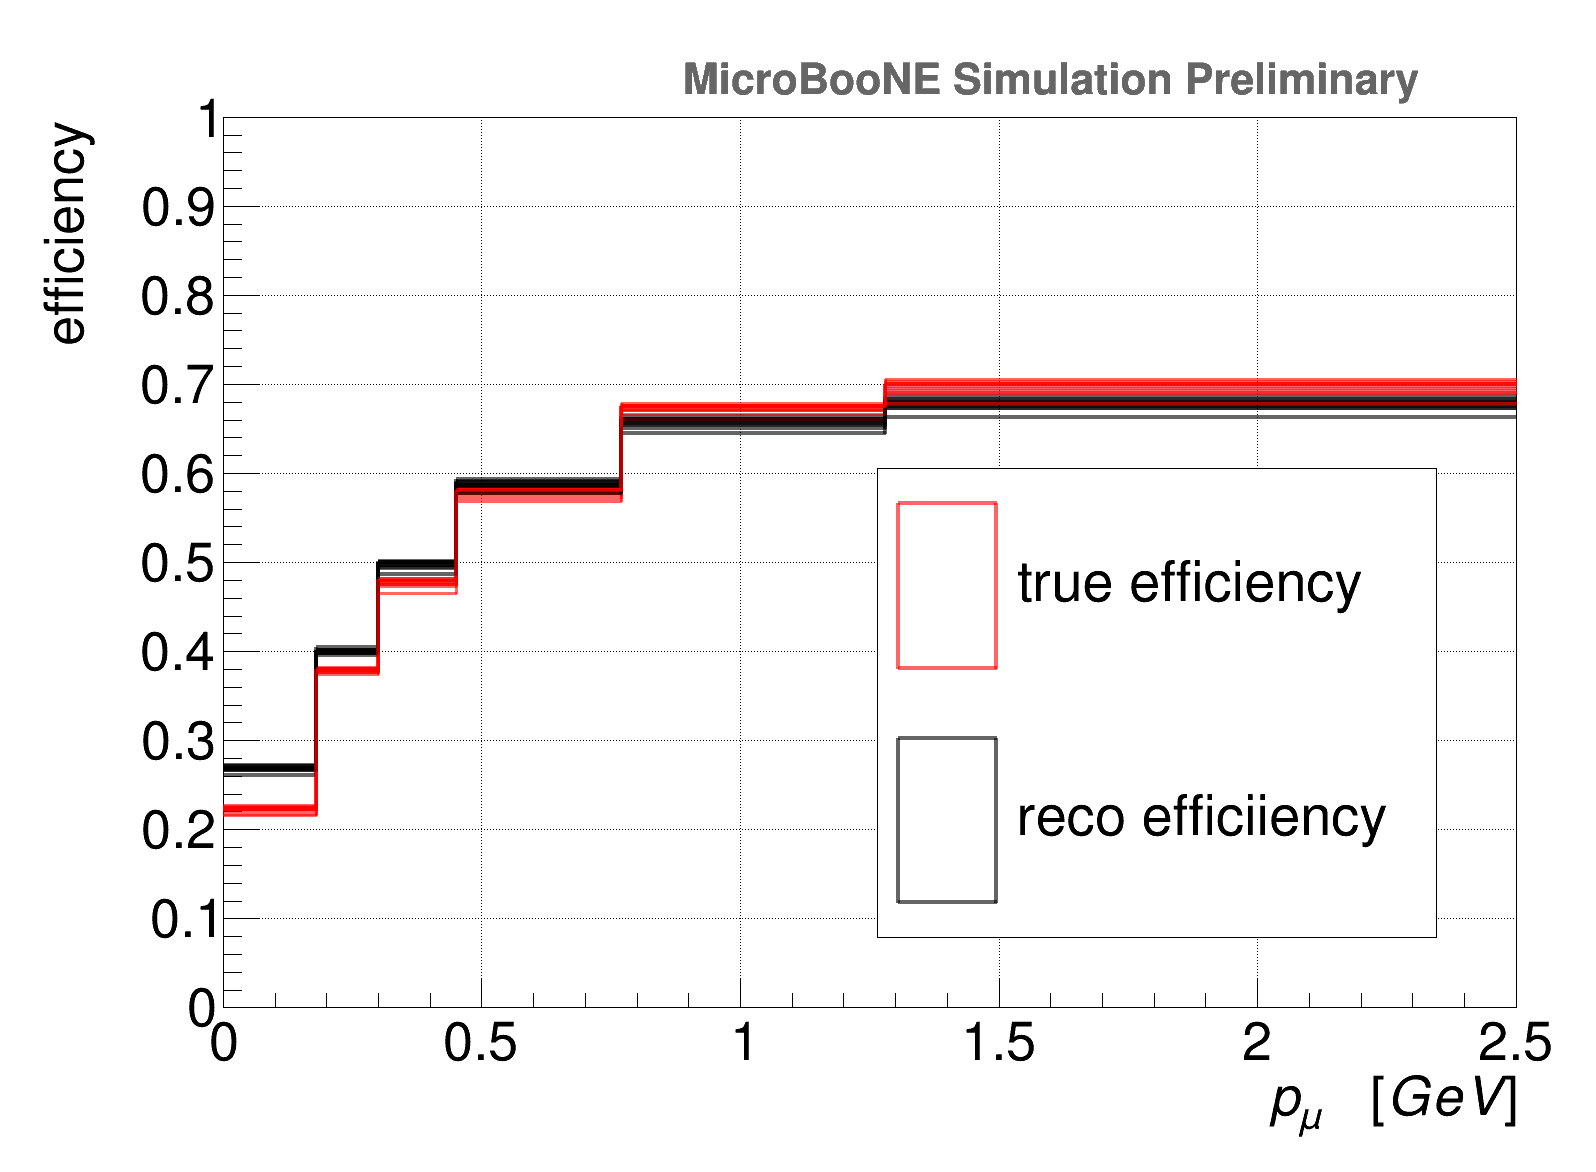

In [26]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
#del h_files_z[:]
#del h_files_n[:]
del h_files[:]
h_files_z = []
h_files_n = []
h_files = []
h_files_tilde = []

i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.55,0.2,0.9,0.6) # LEGEND LEFT
for x in files:
    h_files_z.append(x.Get('h_eff_true_energy_z'))
    h_files_n.append(x.Get('h_eff_true_energy_n'))
    h_files_tilde.append(x.Get('h_eff_tilde'))
    h_files.append(h_files_z[i])
    h_files[i].Divide(h_files_n[i])
    h_files[i].SetLineColorAlpha(ROOT.kRed,0.6)
    h_files_tilde[i].SetLineColorAlpha(ROOT.kBlack,0.6)
    #if (i+1)==10:
    #    h_files[i].SetLineColorAlpha(30,0.6)
    #    h_files_tilde[i].SetLineColorAlpha(30,0.6)
    h_files[i].SetLineWidth(3)
    h_files[i].SetMaximum(1)
    h_files[i].SetMinimum(0)
    #legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetYTitle("efficiency")
        h_files[i].SetXTitle("p_{\mu} \t [GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        h_files_tilde[i].Draw('hist same')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
        h_files_tilde[i].Draw('hist same')
        h_files[i].SetYTitle("Reconstructed efficiency")
        h_files[i].SetXTitle("p_{\mu} \t [GeV]")
    i+=1
legend.AddEntry(h_files[0],'true efficiency',"f")
legend.AddEntry(h_files_tilde[0],'reco efficiiency',"f")
h_files[0].Draw("hist same")
#legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_both_detsys.png")
c1.SaveAs(outputdir_pdf + "h_eff_both_detsys.pdf")
c1.SaveAs(outputdir_root + "h_eff_both_detsys.root")

In [27]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_overlay_detsys_unscaled.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_overlay_detsys_unscaled.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_overlay_detsys_unscaled.root has been created


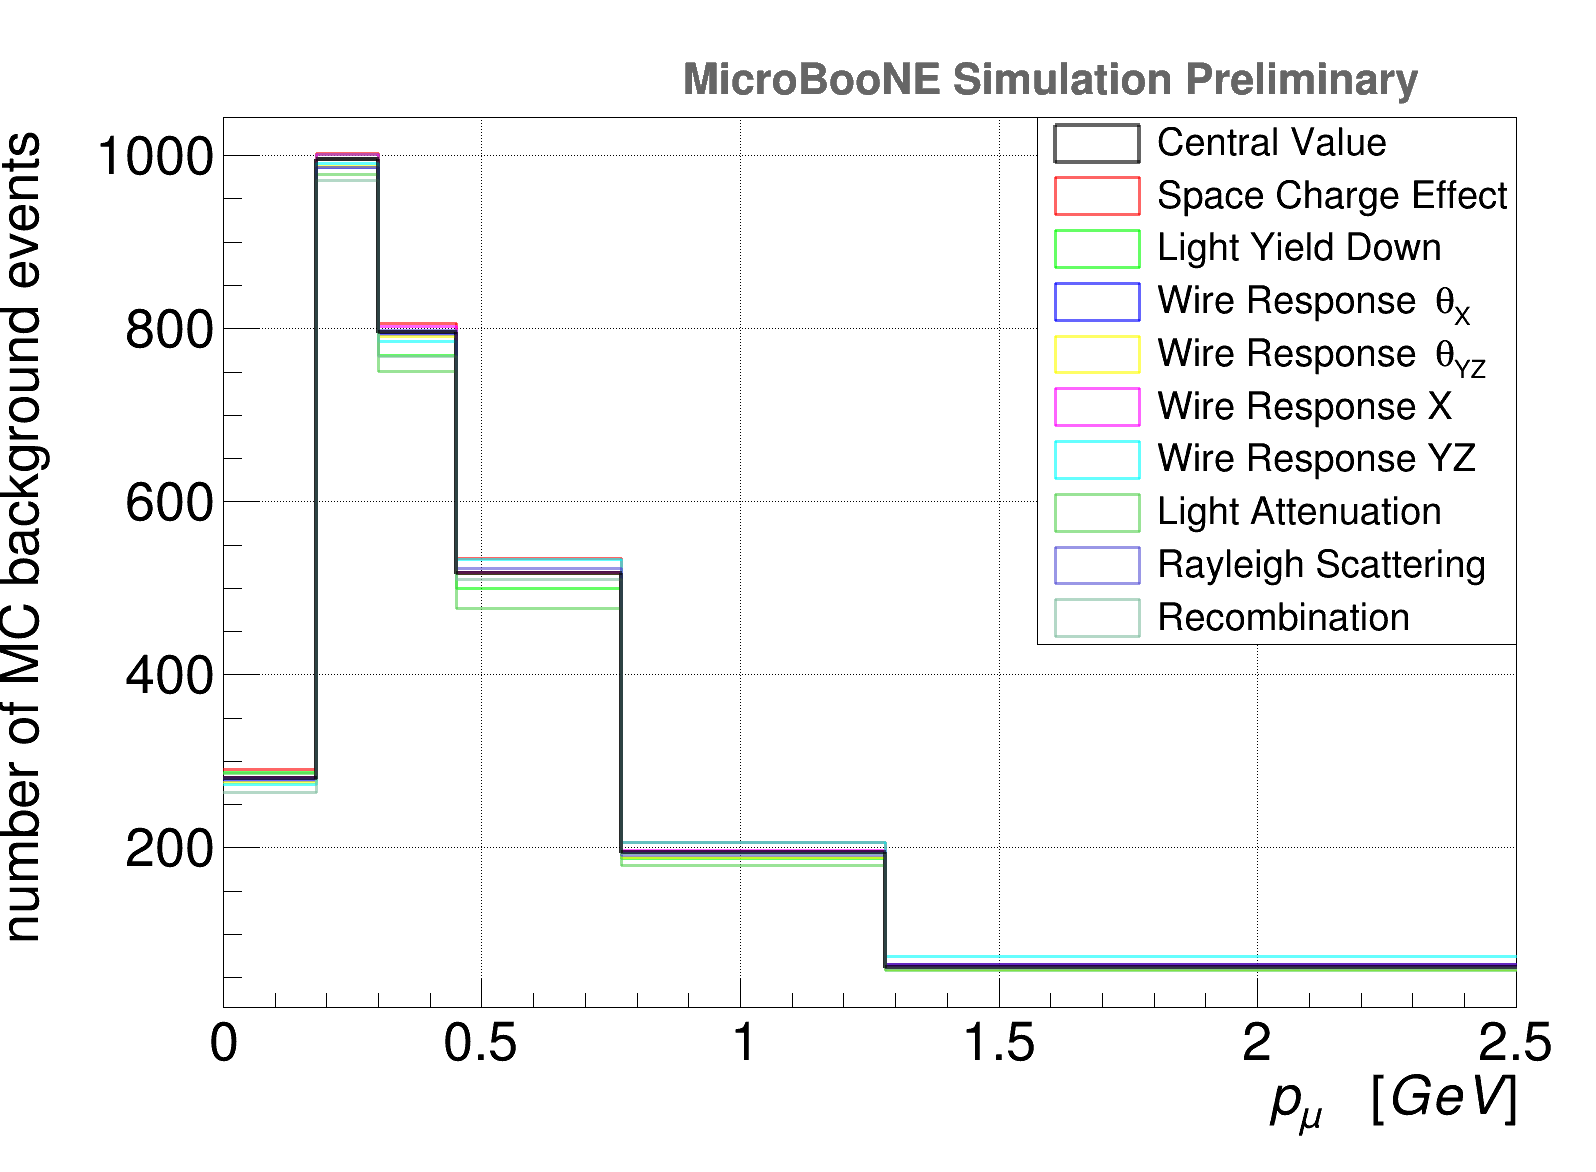

In [28]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
#del h_files[:]
h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.45,0.95,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT
for x in files:
    h_tmp = x.Get('h_overlay')
    h_files.append(h_tmp.Clone())
    h_files[i].SetLineColorAlpha(i+1,0.6)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.6)
    h_files[i].SetLineWidth(3)
    h_files[i].Scale(1.0/0.0638845208392)
    #h_files[i].SetMinimum(0)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        #h_files[i].SetMaximum(70)
        h_files[i].SetYTitle("number of MC background events")
        h_files[i].SetXTitle("p_{\mu} \t [GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        #h_files[i].SetMaximum(70)
        h_files[i].Draw("hist same")
        h_files[i].SetYTitle("number of MC background events")
        h_files[i].SetXTitle("p_{\mu} \t [GeV]")
    i+=1
h_files[0].Draw("hist same")
#legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_overlay_detsys_unscaled.png")
c1.SaveAs(outputdir_pdf + "h_overlay_detsys_unscaled.pdf")
c1.SaveAs(outputdir_root + "h_overlay_detsys_unscaled.root")


In [29]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_xsec_detsys_all_det.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_xsec_detsys_all_det.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_xsec_detsys_all_det.root has been created


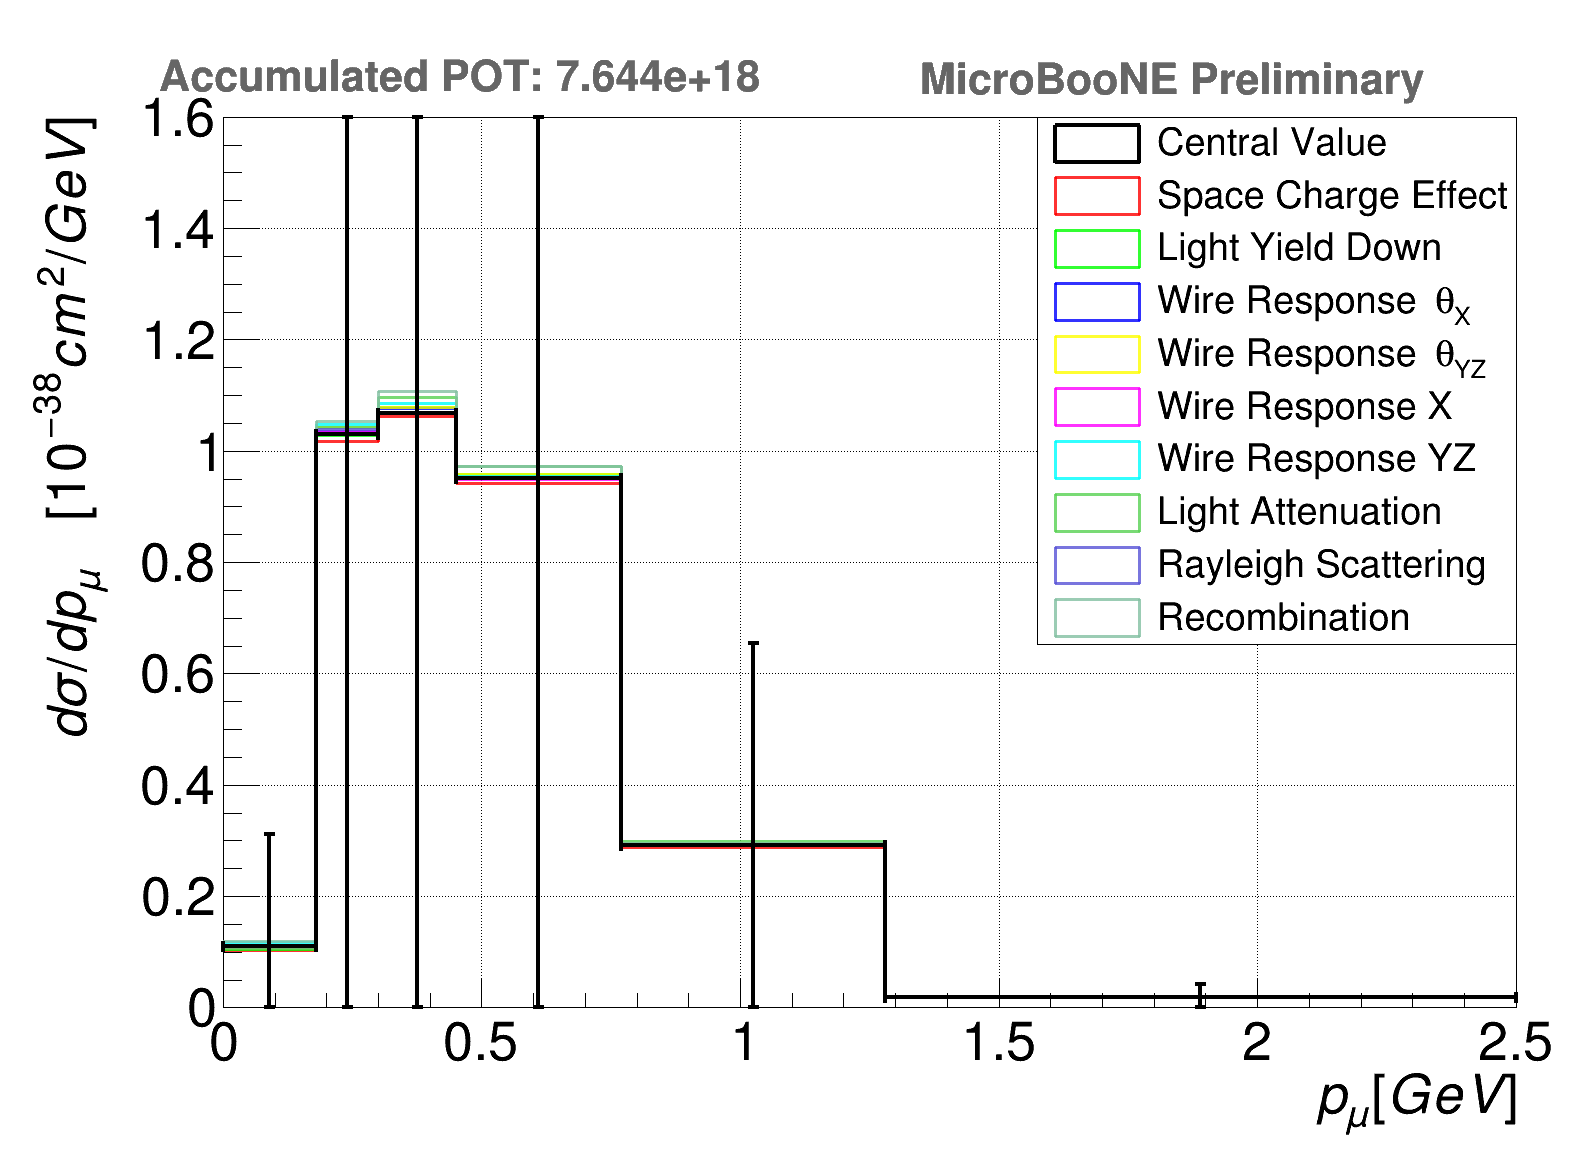

In [30]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.45,0.95,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_data'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(1.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
    h_files[i].SetXTitle("p_{\mu} [GeV]")
    if i == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
#for i in range(1,h_files[0].GetNbinsX()+1):
#    h_files[0].SetBinError(i,h_files[0].GetBinError(i)+math.sqrt(h_covariance.GetBinContent(i,i)))
h_files[0].SetLineColor(ROOT.kBlack)
h_files[0].Draw("hist E1 same")
h_stat = h_files[0].Clone()
legend.Draw()

c1.Draw()
del h_files[:]
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.SaveAs(outputdir_png + "h_xsec_detsys_all_det.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_all_det.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_all_det.root")

#h_files.clear()

In [31]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_xsec_detsys_wError.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_xsec_detsys_wError.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_xsec_detsys_wError.root has been created


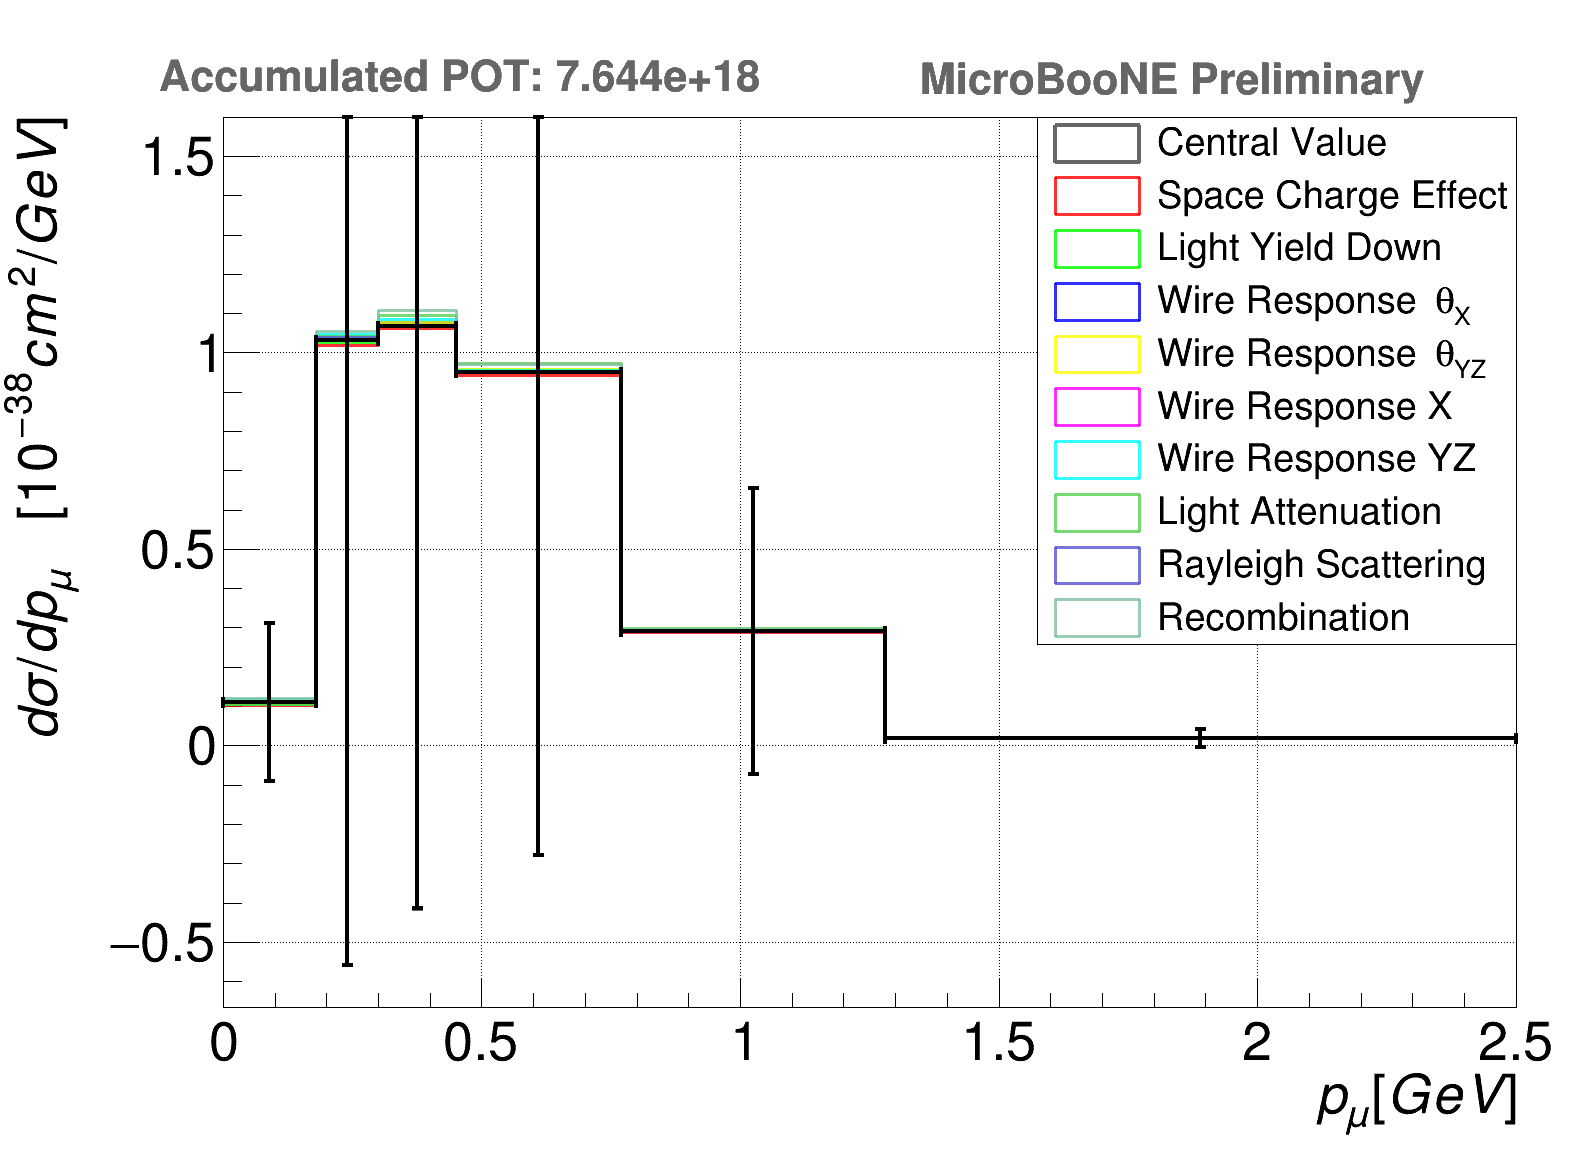

In [32]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.45,0.95,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_data'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(1.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
    h_files[i].SetXTitle("p_{\mu} [GeV]")
    if i == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('E1')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
for i in range(1,h_files[0].GetNbinsX()+1):
    h_files[0].SetBinError(i,math.sqrt(math.pow(h_files[0].GetBinError(i),2)+h_covariance.GetBinContent(i,i)*1e76))
    #h_files[0].SetBinError(i,h_files[0].GetBinError(i)+math.sqrt(h_covariance.GetBinContent(i,i))*1e38)
h_files[0].SetLineColor(ROOT.kGray+2)
h_files[0].Draw("E1 same")
h_stat.SetLineColor(ROOT.kBlack)
h_stat.SetMarkerSize(0.9)
h_stat.Draw('hist E1 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_wError.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_wError.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_wError.root")

#h_files.clear()

In [33]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


0.0156576352259
0.0366818515246
0.0546844952879
0.0330532432629
0.0100147836064
0.000808964894418


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_xsec_detsys_errdetsys_only.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_xsec_detsys_errdetsys_only.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_xsec_detsys_errdetsys_only.root has been created


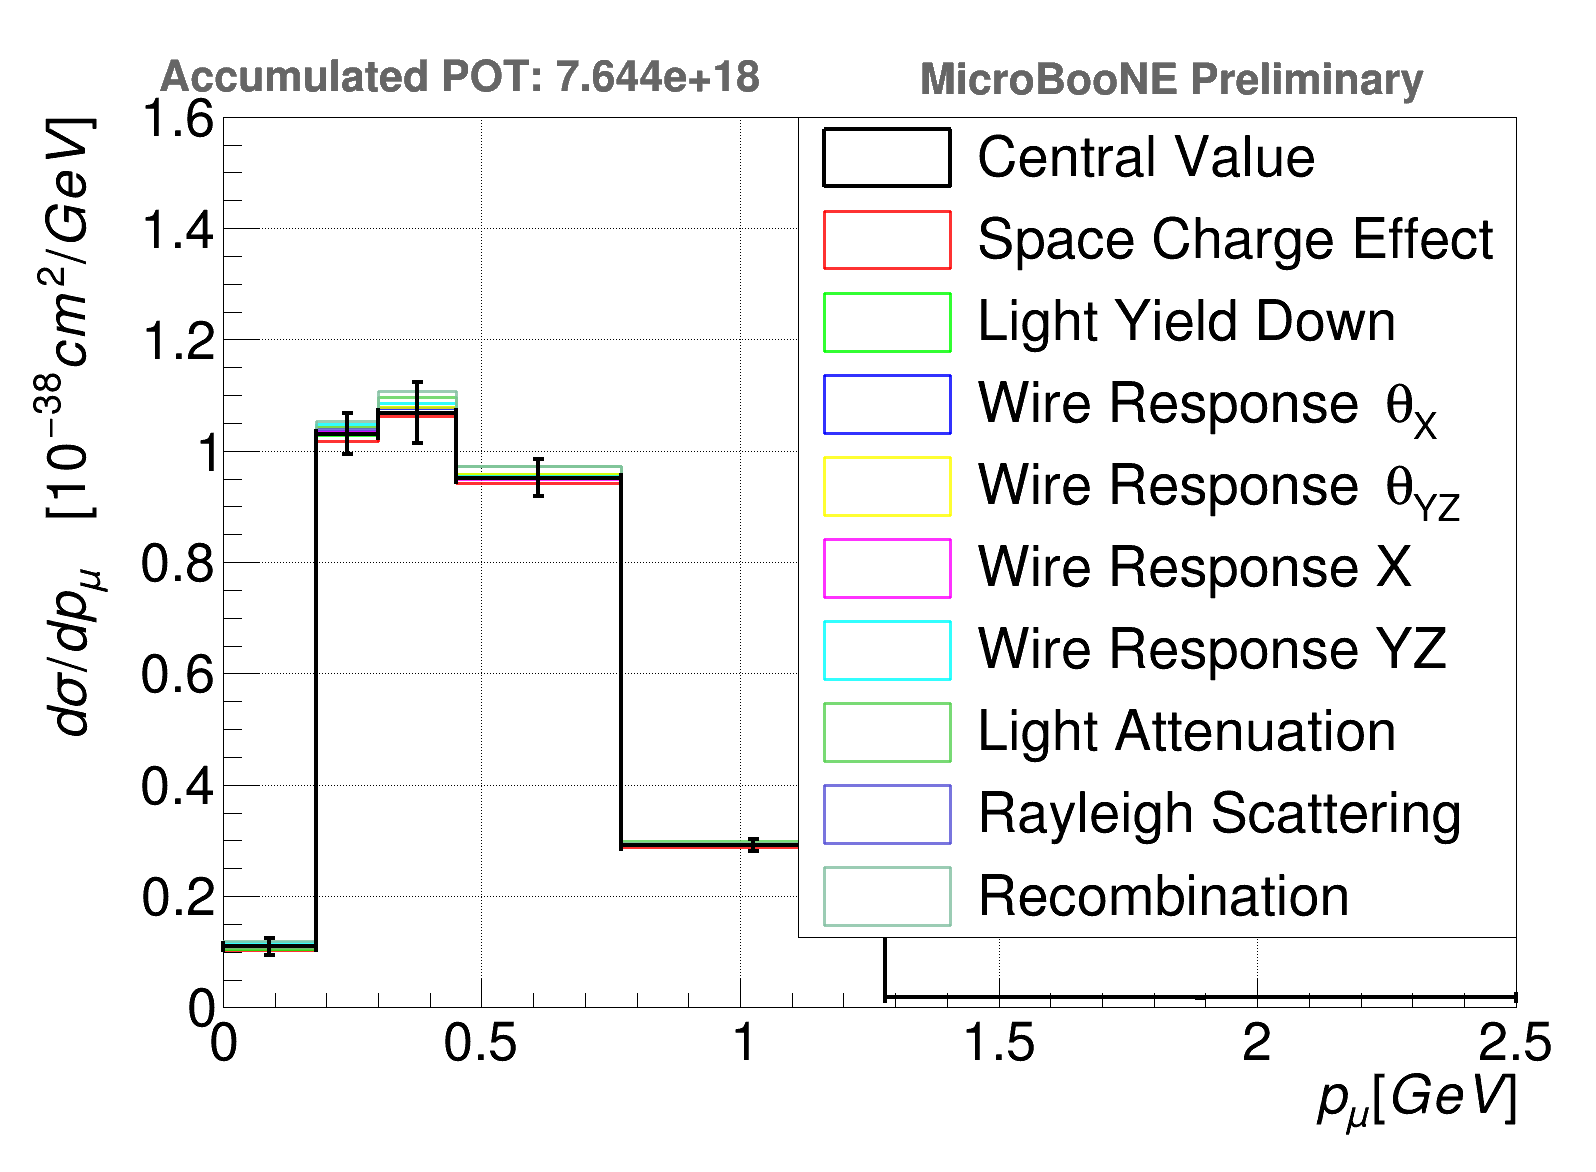

In [34]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
legend = ROOT.TLegend(0.5,0.2,0.95,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_data'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(1.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
    h_files[i].SetXTitle("p_{\mu} [GeV]")
    if i == 0:
        for j in range(1,h_files[0].GetNbinsX()+1):
            h_files[0].SetBinError(j,math.sqrt(h_covariance.GetBinContent(j,j)*1e76))
            print h_files[0].GetBinError(j)
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('E1')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
h_files[0].SetLineColor(ROOT.kBlack)
h_files[0].Draw("E1 hist same")
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_errdetsys_only.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_errdetsys_only.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_errdetsys_only.root")

#h_files.clear()

0.0156576352259
0.0366818515246
0.0546844952879
0.0330532432629
0.0100147836064
0.000808964894418


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_xsec_detsys_errdetsys_ratio.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_xsec_detsys_errdetsys_ratio.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_xsec_detsys_errdetsys_ratio.root has been created


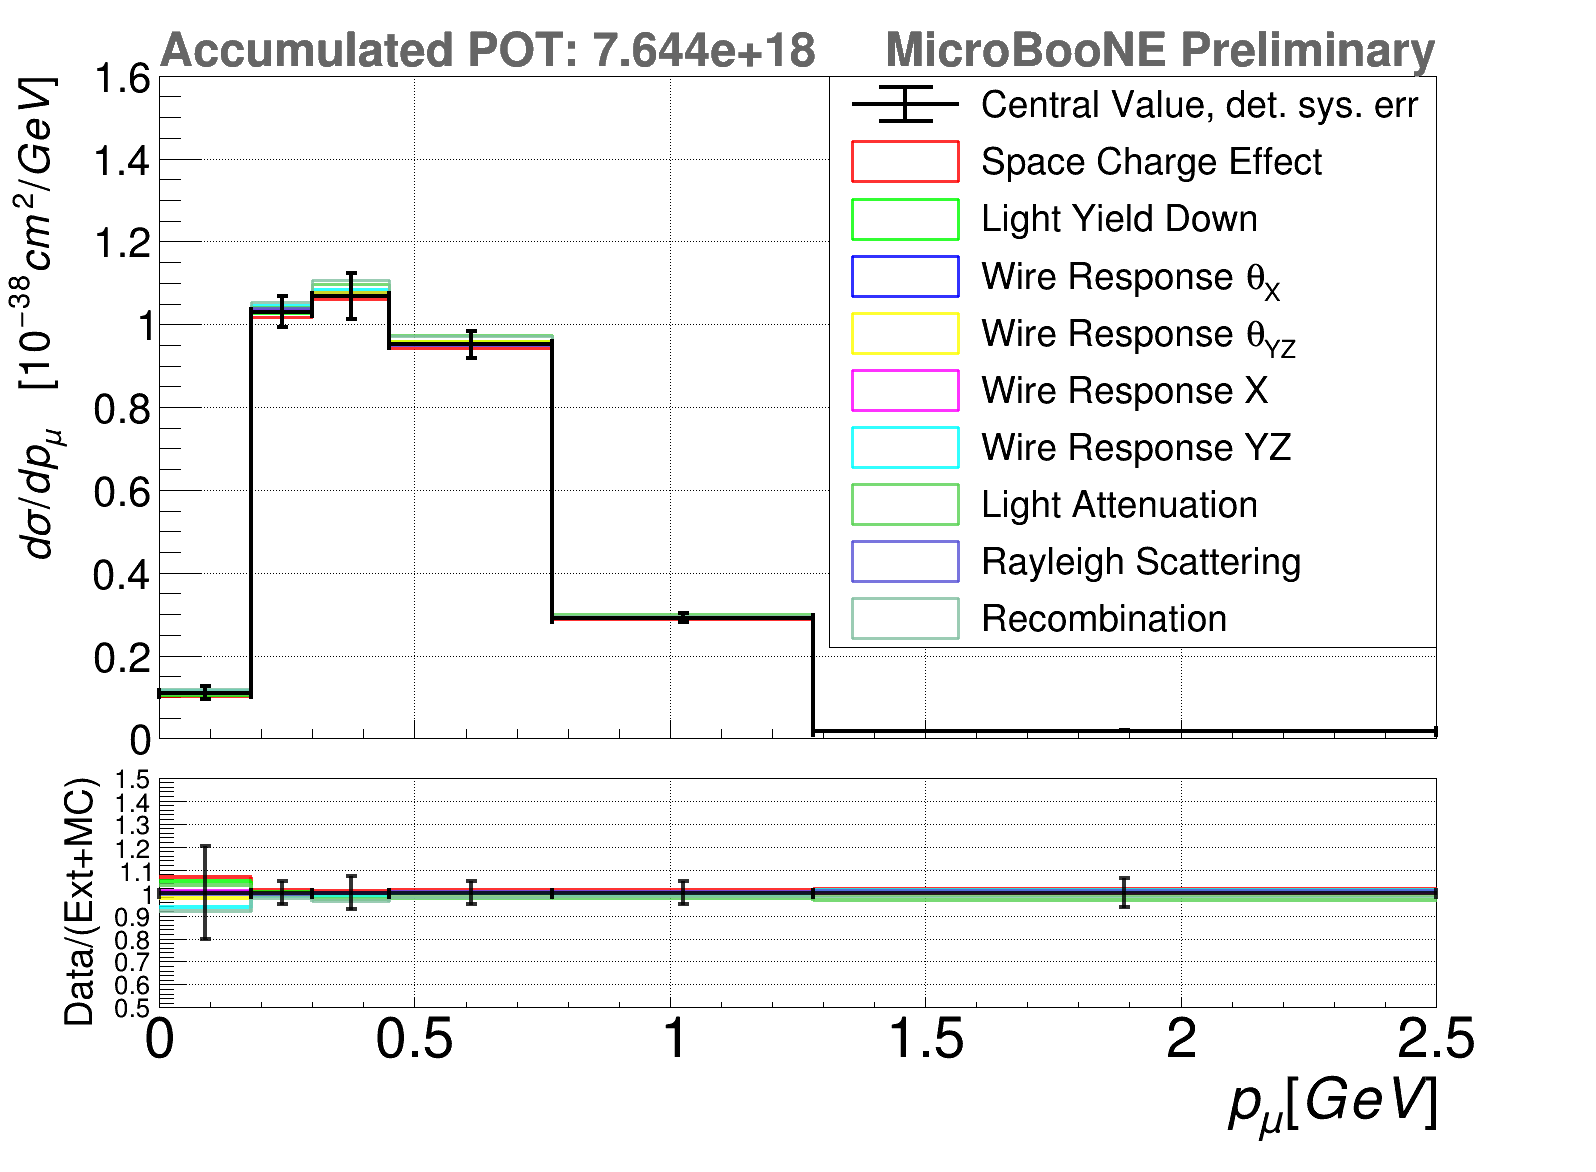

In [35]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
legend = ROOT.TLegend(0.52,0.15,0.9,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)
for x in files:
    h_files.append(x.Get('h_xsec_data'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(1.6)
    h_files[i].SetMinimum(0)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    if i ==0:
        legend.AddEntry(h_files[i],'Central Value, det. sys. err',"lep")
    else:
        legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
    h_files[i].SetXTitle("p_{\mu} [GeV]")
    if i == 0:
        for j in range(1,h_files[0].GetNbinsX()+1):
            h_files[0].SetBinError(j,math.sqrt(h_covariance.GetBinContent(j,j)*1e76))
            print h_files[0].GetBinError(j)
        #h_files[i].GetYaxis().SetTitleSize(0.06)
        #h_files[i].GetYaxis().SetTitleOffset(0.0)
        #h_files[i].GetYaxis().SetLabelSize(0.05)
        #h_files[i].GetXaxis().SetTitleSize(0.05)
        #h_files[i].GetXaxis().SetLabelSize(0.05)
        #h_files[i].GetXaxis().SetTitleOffset(1)
        h_files[i].GetYaxis().SetLabelSize(0.06);
        h_files[i].GetYaxis().SetTitleSize(0.06);
        h_files[i].GetYaxis().SetTitleOffset(0.8);
        h_files[i].GetXaxis().SetLabelOffset(999);
        h_files[i].GetXaxis().SetTitleOffset(999);
        h_files[i].GetXaxis().SetLabelSize(0);
        h_files[i].GetXaxis().SetTitleSize(0);
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('E1')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
h_files[0].SetLineColor(ROOT.kBlack)
h_files[0].Draw("E1 hist same")
legend.Draw()
prelim, pot_tex = draw_adding_ratio()
prelim.Draw()
pot_tex.Draw()

c1.cd()
h_files[0].GetXaxis().SetLabelOffset(0);
h_files[0].GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
h_files2 = []
for i,x in enumerate(files):
    h_files2.append(h_files[0].Clone())
    h_files2[i].Divide(h_files[i])
    h_files2[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files2[i].SetLineColorAlpha(30,0.8)
    if i ==0 :
        h_files2[i].SetYTitle('Data/(Ext+MC)')
        h_files2[i].GetYaxis().SetTitleSize(0.1)
        h_files2[i].GetYaxis().SetTitleOffset(0.3)
        h_files2[i].GetYaxis().SetLabelSize(0.07)

        h_files2[i].GetXaxis().SetTitleSize(0.15)
        h_files2[i].GetXaxis().SetLabelSize(0.15)
        h_files2[i].GetXaxis().SetTitleOffset(1)
        h_files2[i].SetMinimum(0.5)
        h_files2[i].SetMaximum(1.5)
        h_files2[i].Draw('hist')
    else:
        h_files2[i].Draw('hist same')

h_files2[0].Draw('E1 same')
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_errdetsys_ratio.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_errdetsys_ratio.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_errdetsys_ratio.root")

#h_files.clear()

In [36]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [37]:
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1

In [38]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
del h_files[:]
h_files_data = []
h_files_ext = []
h_files_dirt = []
h_files_overlay = []
h_files_eff = []
h_files_eff_true = []

'''Number of data: 1348
Number of ext: 142.179032863
Number of dirt: 32.1298248268
Number of overlay: 201.313414536
Number of overlay signal: 970.556760372
'''
n_data = 1348.0
n_ext = 142.179032863
n_dirt = 32.1298248268
N_tot = 4.10331e+31
beam_flux = 5.64049e+09

i = 0
xsec_CV = 0.0
tot_diff = 0.0
print f_cv
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT
for x in files:
    print '###', name_files[i],'###################################################################'
    h_files_overlay.append(x.Get('h_overlay'))
    h_files_eff.append(x.Get('h_eff_true_energy_z'))
    h_files_eff_true.append(x.Get('h_eff_true_energy_n'))

    #print h_files_eff[i].Integral(0,binnum+1)
    #print h_files_eff_true[i].Integral(0,binnum+1)
    
    eff = h_files_eff[i].Integral(0,binnum+1)/h_files_eff_true[i].Integral(0,binnum+1)
    xsec = (n_data - n_ext - n_dirt - h_files_overlay[i].Integral(0,binnum+1))/(N_tot*beam_flux*eff)
    if i==0:
        xsec_CV = xsec
    
    #print n_data, n_ext, n_dirt, h_files_overlay[i].Integral(0,binnum+1)
    #print N_tot, beam_flux, eff
    #print 'Total xsec of: ',name_files[i],' = {0:0.5f}'.format(xsec*1e38),' difference= {0:0.2f}'.format((xsec - xsec_CV)/xsec_CV*100),'%'
    print 'Total xsec of: ',name_files[i],' = {0:0.5f}e-38'.format(xsec*1e38),' & {0:0.2f}'.format((xsec - xsec_CV)/xsec_CV*100),'\%'
    i +=1
    tot_diff = tot_diff+(xsec - xsec_CV)*(xsec - xsec_CV)
tot_diff = math.sqrt(tot_diff)
print 'Total differencs: ',tot_diff, ' in percent: ',tot_diff/xsec_CV*100,'%'

Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_CV_extra/xsec_detsys_CV.root Title: 
### Central Value ###################################################################
Total xsec of:  Central Value  = 0.76964e-38  & 0.00 \%
### Space Charge Effect ###################################################################
Total xsec of:  Space Charge Effect  = 0.76306e-38  & -0.85 \%
### Light Yield Down ###################################################################
Total xsec of:  Light Yield Down  = 0.77481e-38  & 0.67 \%
### Wire Response #theta_{X} ###################################################################
Total xsec of:  Wire Response #theta_{X}  = 0.77276e-38  & 0.41 \%
### Wire Response #theta_{YZ} ###################################################################
Total xsec of:  Wire Response #theta_{YZ}  = 0.77651e-38  & 0.89 \%
### Wire Response X ###################################################################
Total xsec of: 

In [39]:
x.Get('h_data')

<ROOT.TH1F object ("h_data") at 0x78d09a0>

In [40]:
RootFile.Close()

# now in cos theta

In [41]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_xsec_detsys_theta_all.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_xsec_detsys_theta_all.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_xsec_detsys_theta_all.pdf has been created


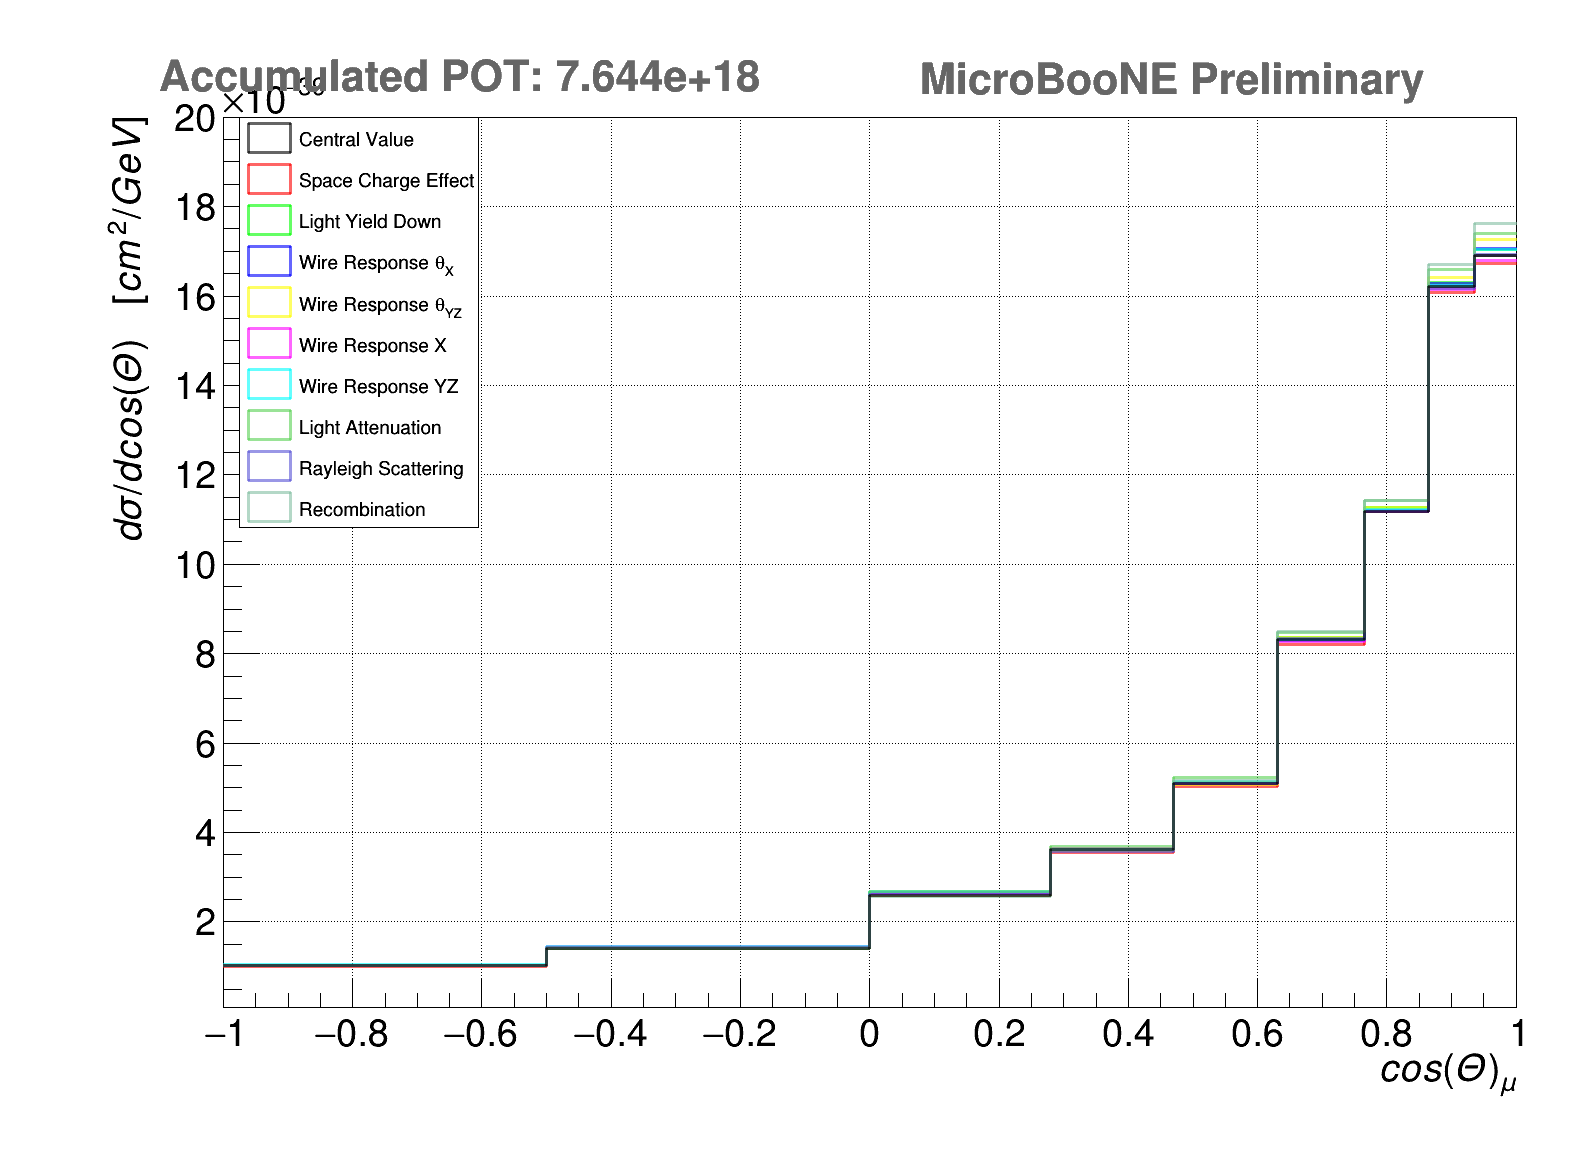

In [42]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_data_theta'))
    h_files[i].SetLineColorAlpha(i+1,0.6)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.6)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d cos(\Theta) \t [cm^{2}/GeV]")
    h_files[i].SetXTitle("cos(\Theta)_{\mu}")
    if x == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
h_files[0].Draw("hist same")
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_theta_all.png")
c1.SaveAs(outputdir_root + "h_xsec_detsys_theta_all.root")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_theta_all.pdf")

#h_files.clear()

In [43]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ' ,'LYAttenuation', 'LYRayleigh' ]
num_file = 11
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT

for x in files:
    h_files.append(x.Get('h_xsec_data_theta'))
num_bins = h_files[0].GetNbinsX()

xsec_diff_matrix = np.zeros((num_bins))

xsec_cov_matrix = np.zeros((num_bins,num_bins))

for f in range(1,num_file-1):
    xsec_diff_matrix = np.zeros((num_bins))
    for b in range(num_bins):
        xsec_diff_matrix[b]= (h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1) )/(h_files[0].GetBinContent(b+1) + 1e-100)
    #print np.matmul(xsec_diff_matrix,np.transpose(xsec_diff_matrix))
    xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(num_bins,1) * xsec_diff_matrix
np.save(output_filedir+'frac_covariance_theta_detsys',xsec_cov_matrix)

In [44]:
RootFile_theta = ROOT.TFile(output_filedir+"Detector_systematic_theta.root","RECREATE");

741

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_frac_covariance_theta_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_frac_covariance_theta_detsys.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_frac_covariance_theta_detsys.root has been created


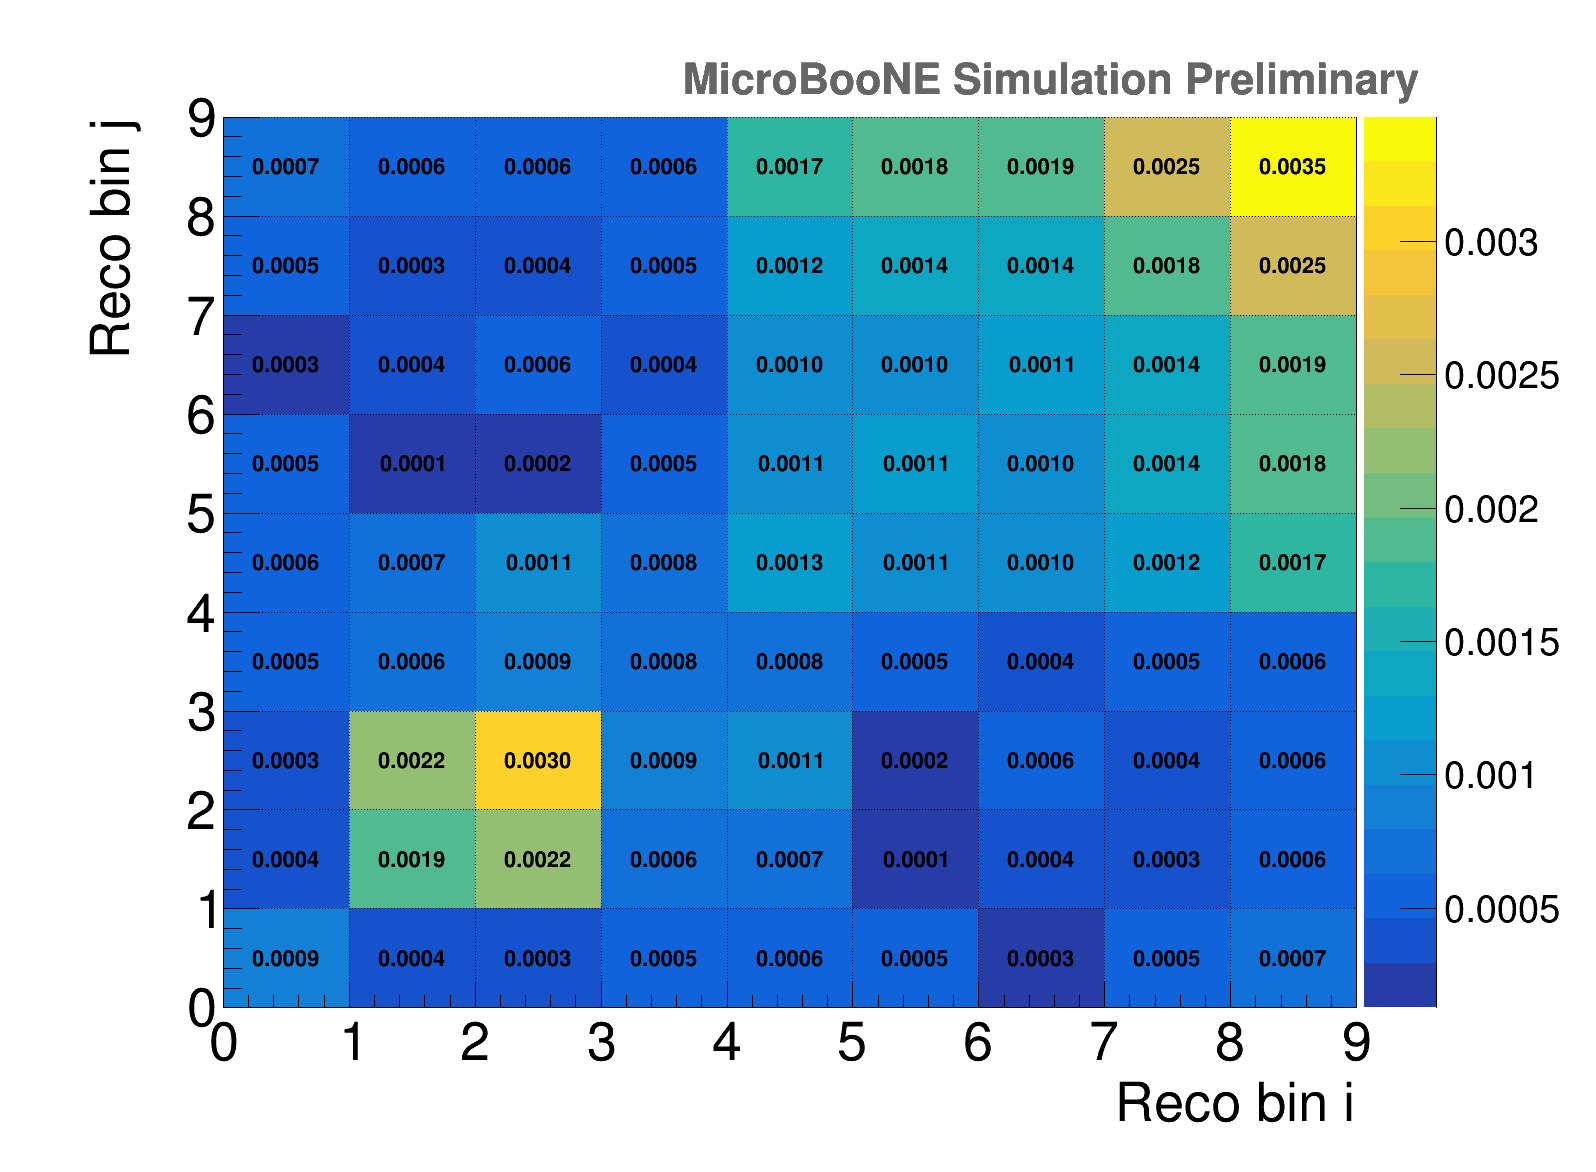

In [45]:
ROOT.gStyle.SetPaintTextFormat('0.6f')
h_covariance = ROOT.TH2F("h_covariance",'Covariance matrix',9,0,9,9,0,9)
for i in range(num_bins):
    for j in range(num_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.15)
ROOT.gStyle.SetPaintTextFormat('0.4f')
h_covariance.Draw('colz')
c1.SetLogz(0)
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_frac_covariance_theta_detsys.png")
c1.SaveAs(outputdir_pdf + "h_frac_covariance_theta_detsys.pdf")
c1.SaveAs(outputdir_root + "h_frac_covariance_theta_detsys.root")
h_covariance.Write('h_frac_covariance')

In [46]:
quad_sum = 0.1
for i in range(num_bins):
    quad_sum = quad_sum+xsec_cov_matrix[i,i]
    print i, ' - ', xsec_cov_matrix[i,i], ' sqrt: ', math.sqrt(xsec_cov_matrix[i,i])
    
print 'Qad sum: ', quad_sum,' sqrt: ', math.sqrt(quad_sum)
print 'Qad sum: ', quad_sum/num_bins,' sqrt: ', math.sqrt(quad_sum/num_bins)
    

0  -  0.0008946695029711236  sqrt:  0.0299110264446
1  -  0.0019065463552315445  sqrt:  0.0436640167098
2  -  0.003046942247546193  sqrt:  0.055199114554
3  -  0.0007591387231538758  sqrt:  0.0275524721786
4  -  0.0012841915293538109  sqrt:  0.0358356181662
5  -  0.0011326542073414937  sqrt:  0.0336549284257
6  -  0.001128857865977146  sqrt:  0.0335984801141
7  -  0.0018317080738329203  sqrt:  0.0427984587787
8  -  0.003466257200546599  sqrt:  0.0588749284547
Qad sum:  0.11545096570595471  sqrt:  0.339780761236
Qad sum:  0.012827885078439412  sqrt:  0.113260253745


In [47]:
quad_sum = 0.0
for f in range(1,num_file-1):
    for b in range(1):
        err = h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1)
        print err, err/h_files[0].GetBinContent(b+1)
        quad_sum = quad_sum + err*err
print quad_sum , quad_sum/h_files[0].GetBinContent(1)/h_files[0].GetBinContent(1)
print math.sqrt(quad_sum), math.sqrt(quad_sum)/h_files[0].GetBinContent(1)
print h_files[0].GetBinContent(1)

2.49150866957e-41 0.0242747608021
2.04869835484e-42 0.0019960461357
7.96498047122e-42 0.00776027786273
-4.45893171348e-42 -0.00434433570711
4.67192908006e-42 0.00455185897156
-1.14065694996e-41 -0.0111134169252
-7.21668709127e-42 -0.00703121586788
4.40287977491e-42 0.00428972432173
-3.28744619731e-42 -0.00320295775263
9.424916704e-82 0.000894669502971
3.07000272052e-41 0.0299110264446
1.0263782576e-39


In [48]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ' ,'LYAttenuation', 'LYRayleigh' ]
num_file = 11
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT

for x in files:
    h_files.append(x.Get('h_xsec_data_theta'))
num_bins = h_files[0].GetNbinsX()
xsec_diff_matrix = np.zeros((num_bins))
xsec_cov_matrix = np.zeros((num_bins,num_bins))
for f in range(1,num_file-1):
    xsec_diff_matrix = np.zeros((num_bins))
    for b in range(num_bins):
        xsec_diff_matrix[b]= (h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1) )
    #print np.matmul(xsec_diff_matrix,np.transpose(xsec_diff_matrix))
    xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(num_bins,1) * xsec_diff_matrix
    
xsec_corr_matrix = np.zeros((num_bins,num_bins))
for i in range(num_bins):
    for j in range(num_bins):
        xsec_corr_matrix[i][j] = xsec_cov_matrix[i][j]/(math.sqrt(xsec_cov_matrix[i][i]*xsec_cov_matrix[j][j]))

np.save(output_filedir+'correlation_theta_detsys',xsec_corr_matrix)
np.save(output_filedir+'covariance_theta_detsys',xsec_cov_matrix)

917

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_correlation_theta_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_correlation_theta_detsys.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_correlation_theta_detsys.root has been created


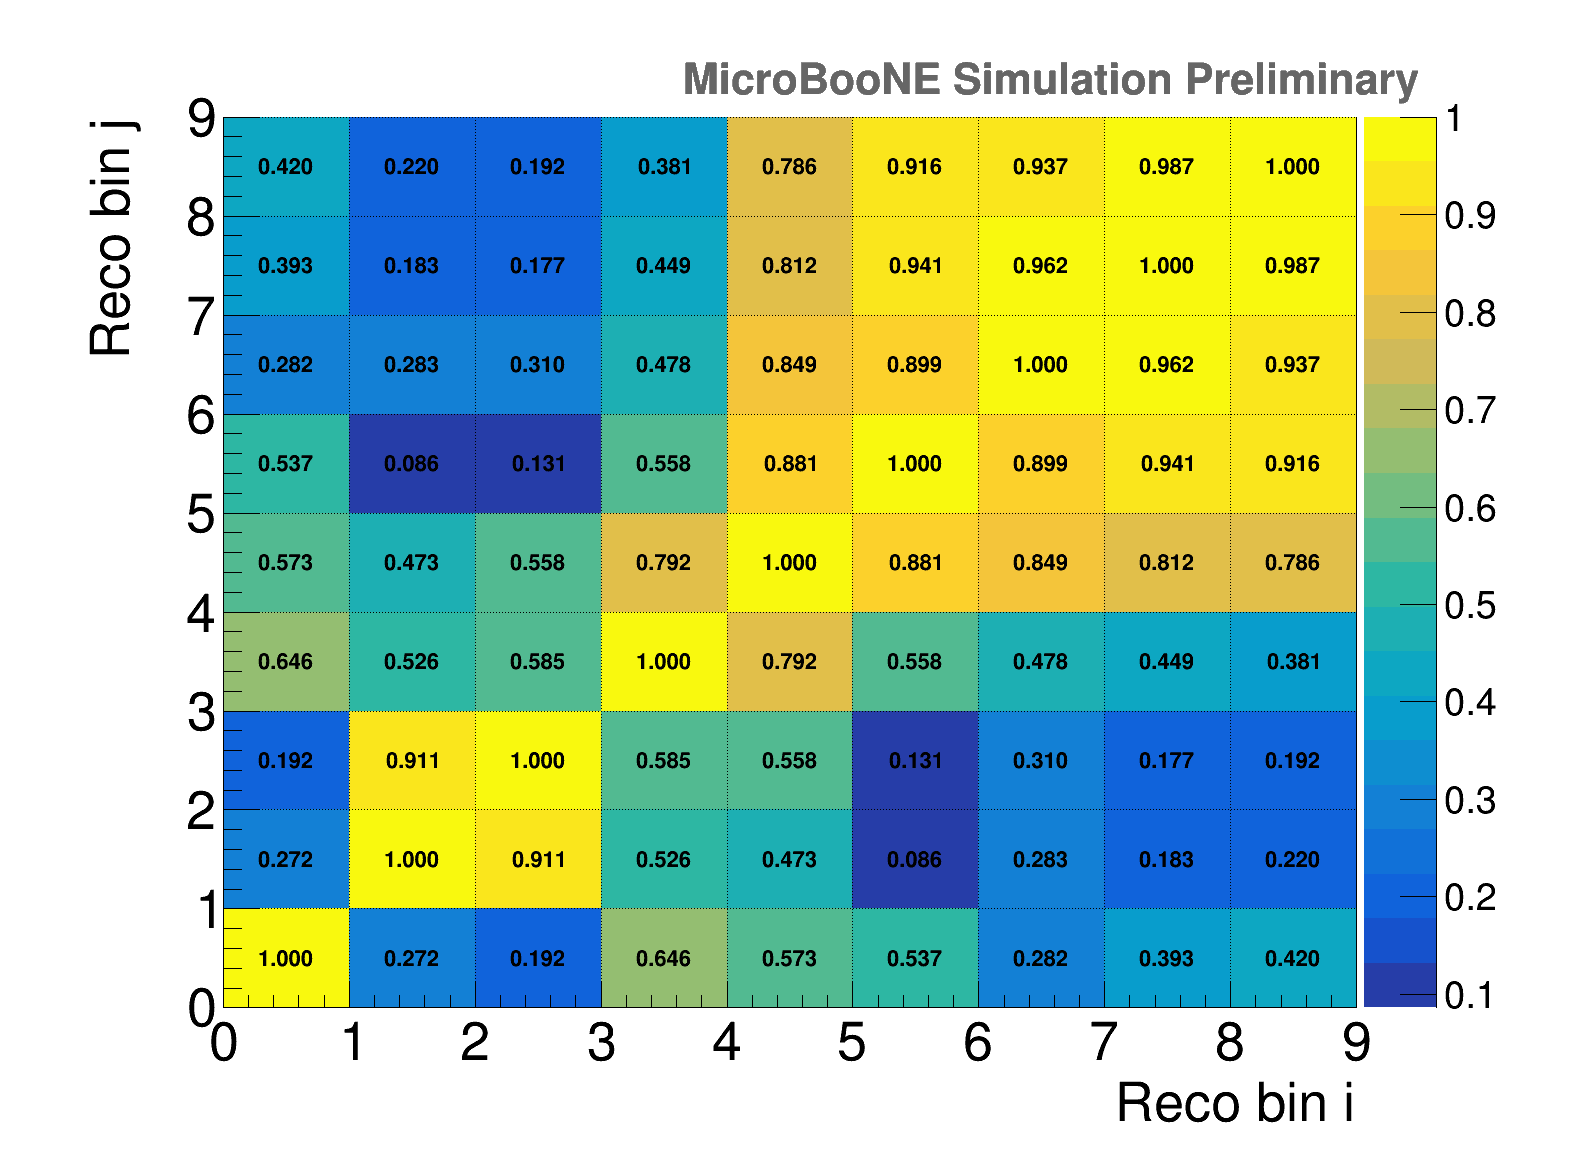

In [49]:
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation = ROOT.TH2D("h_correlation",'Correlation matrix',9,0,9,9,0,9)
for i in range(num_bins):
    for j in range(num_bins):
        h_correlation.SetBinContent(i+1,j+1,xsec_corr_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_correlation.SetXTitle("Reco bin i")
h_correlation.SetYTitle("Reco bin j")
h_correlation.GetYaxis().SetTitleSize(0.05)
h_correlation.GetYaxis().SetTitleOffset(0.0)
h_correlation.GetYaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleSize(0.05)
h_correlation.GetXaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleOffset(1)
h_correlation.SetLineColor(ROOT.kBlack)
h_correlation.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.15)
ROOT.gStyle.SetPaintTextFormat('0.3f')
#h_correlation.SetMinimum(-1)
h_correlation.Draw('colz')
h_correlation.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_correlation_theta_detsys.png")
c1.SaveAs(outputdir_pdf + "h_correlation_theta_detsys.pdf")
c1.SaveAs(outputdir_root + "h_correlation_theta_detsys.root")
h_correlation.Write('h_correlation')

879

Warning in <TFile::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_covariance_theta_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_covariance_theta_detsys.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_covariance_theta_detsys.root has been created


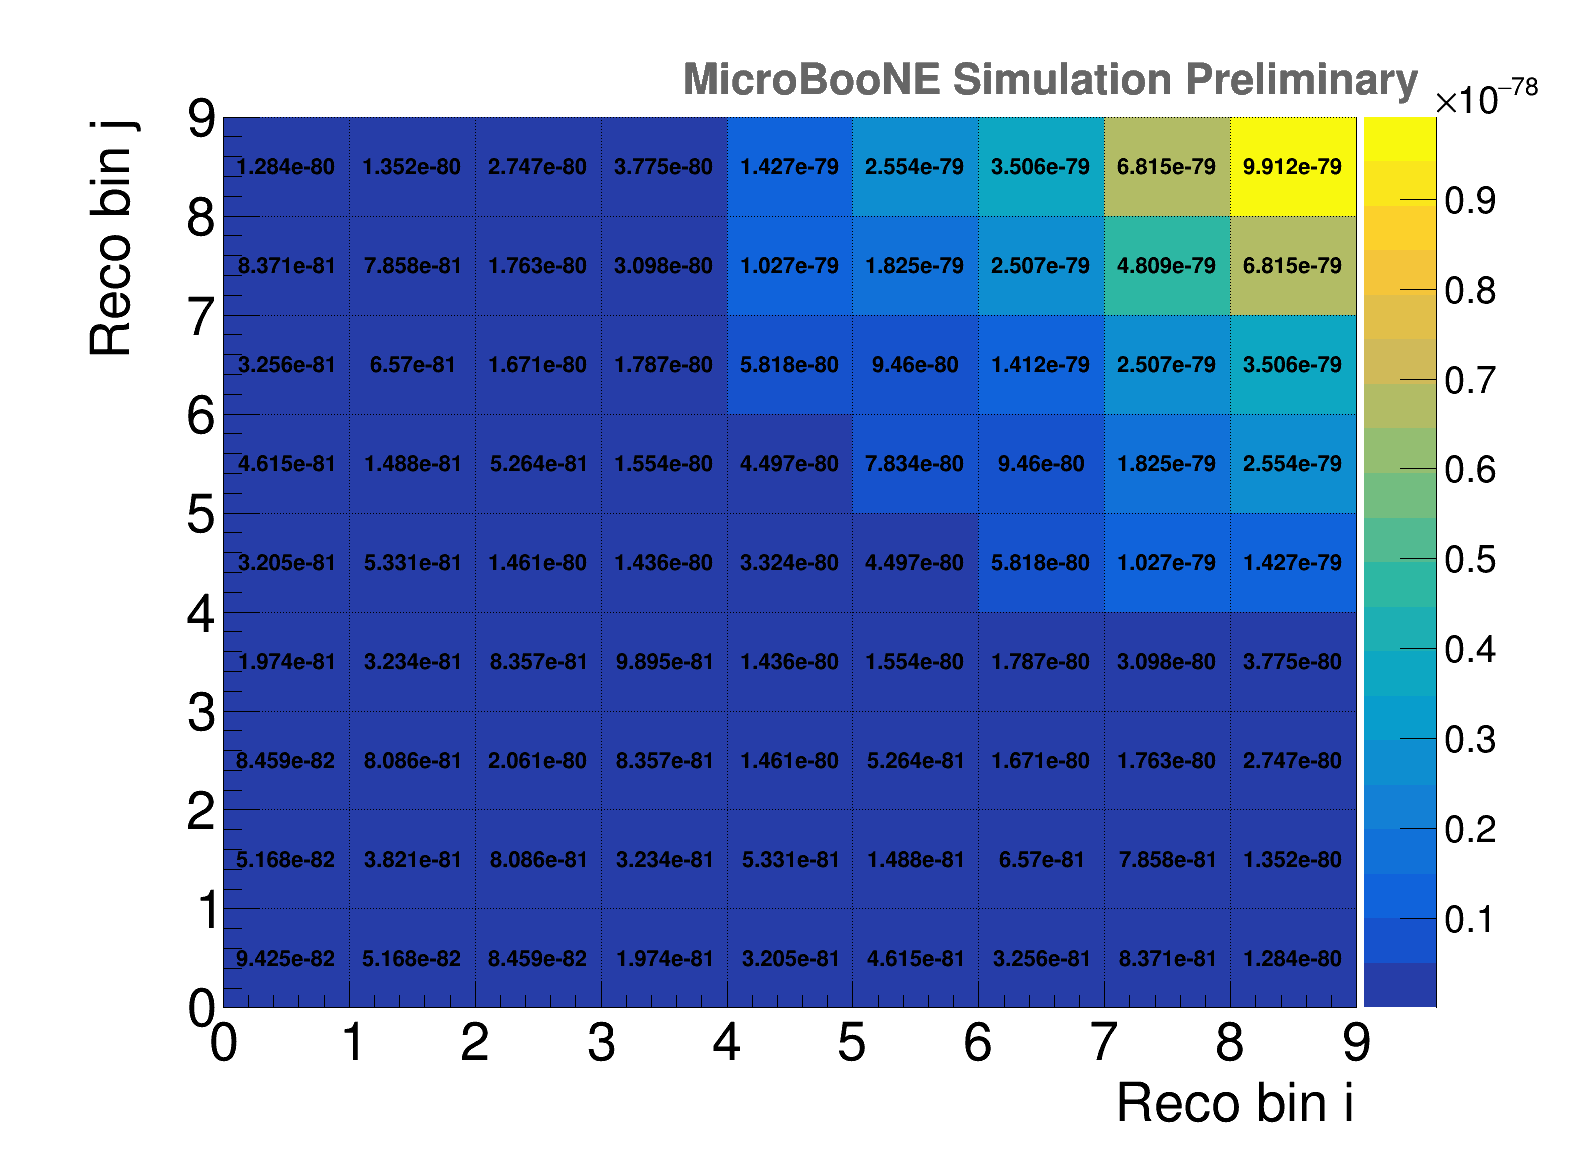

In [50]:
ROOT.gStyle.SetPaintTextFormat('0.3g')
h_covariance = ROOT.TH2D("h_covariance",'Covariance matrix',9,0,9,9,0,9)
for i in range(num_bins):
    for j in range(num_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.15)
ROOT.gStyle.SetPaintTextFormat('0.4g')
h_covariance.Draw('colz')
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_covariance_theta_detsys.png")
c1.SaveAs(outputdir_pdf + "h_covariance_theta_detsys.pdf")
c1.SaveAs(outputdir_root + "h_covariance_theta_detsys.root")
h_covariance.Write('h_covariance')

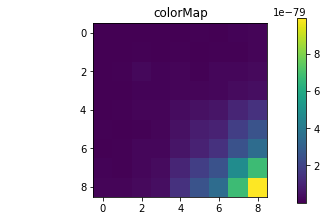

In [51]:
fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(xsec_cov_matrix)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show() 

In [52]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_eff_tilde_theta_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_eff_tilde_theta_detsys.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_eff_tilde_theta_detsys.root has been created


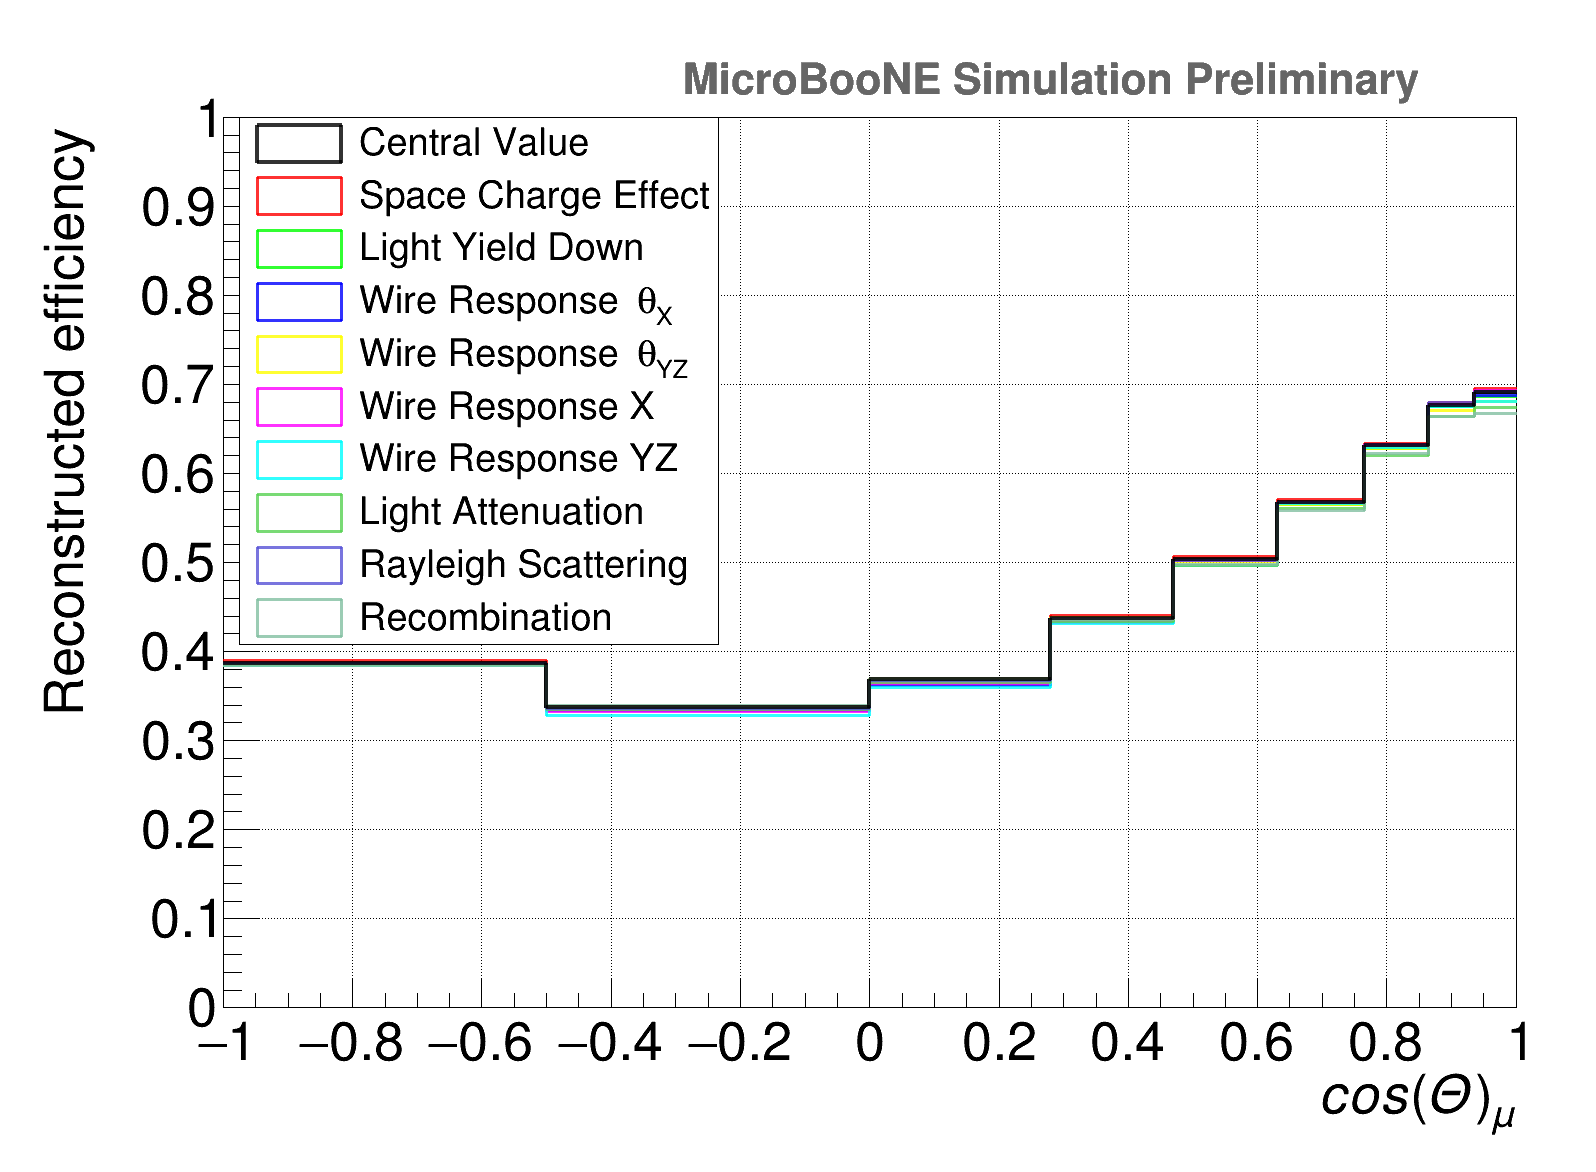

In [53]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
del h_files[:]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_eff_theta_tilde'))
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetYTitle("Reconstructed efficiency")
        #h_files[i].SetXTitle("p_{\mu} \quad [GeV]")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        #h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].SetYTitle("Reconstructed efficiency")
        #h_files[i].SetXTitle("p_{\mu} \quad [GeV]")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        h_files[i].Draw("hist same")
    i+=1
h_files[0].Draw("hist same")
legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_theta_detsys.png")
c1.SaveAs(outputdir_pdf + "h_eff_tilde_theta_detsys.pdf")
c1.SaveAs(outputdir_root + "h_eff_tilde_theta_detsys.root")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_eff_true_theta_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_eff_true_theta_detsys.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_eff_true_theta_detsys.root has been created


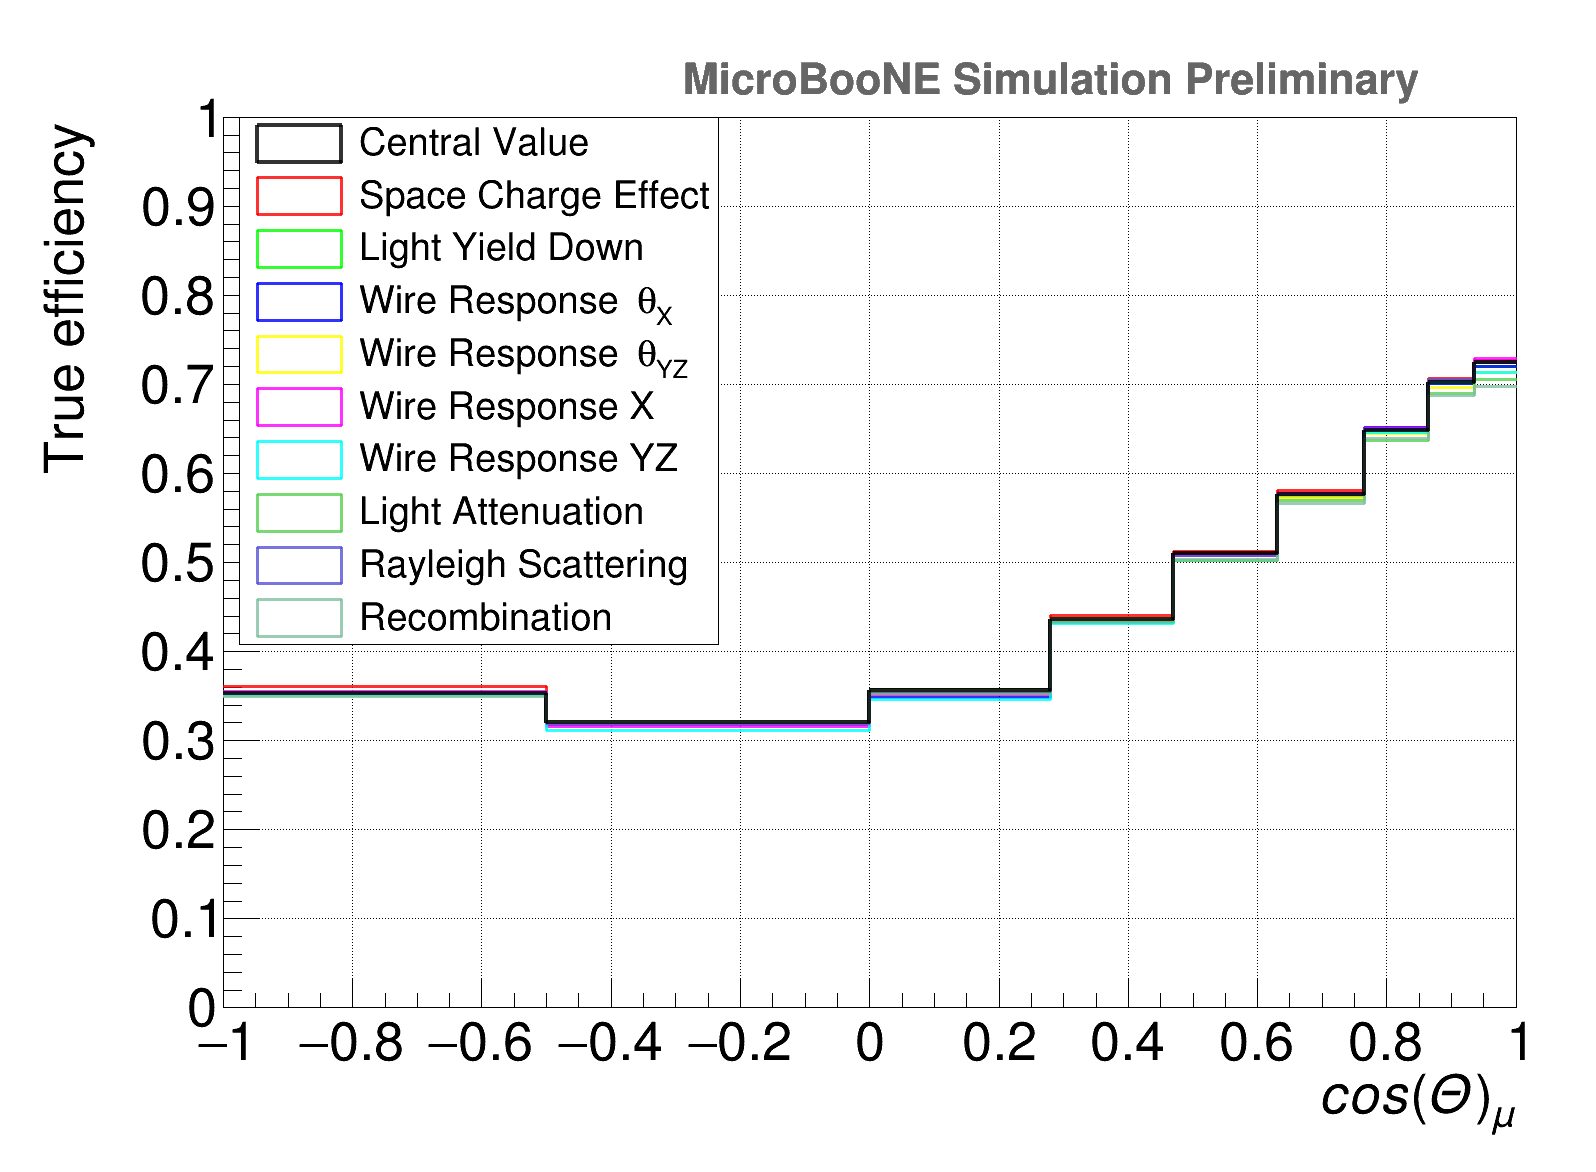

In [54]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
#del h_files_z[:]
#del h_files_n[:]
del h_files[:]
h_files_z = []
h_files_n = []
h_files = []

i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_files_z.append(x.Get('h_eff_true_theta_z'))
    h_files_n.append(x.Get('h_eff_true_theta_n'))
    h_files.append(h_files_z[i])
    h_files[i].Divide(h_files_n[i])
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    h_files[i].SetLineWidth(3)
    h_files[i].SetMaximum(1)
    h_files[i].SetMinimum(0)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetYTitle("True efficiency")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        #h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
        h_files[i].SetYTitle("Reconstructed efficiency")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        #h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
    i+=1
h_files[0].Draw("hist same")
legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_true_theta_detsys.png")
c1.SaveAs(outputdir_pdf + "h_eff_true_theta_detsys.pdf")
c1.SaveAs(outputdir_root + "h_eff_true_theta_detsys.root")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_overlay_theta_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_overlay_theta_detsys.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_overlay_theta_detsys.root has been created


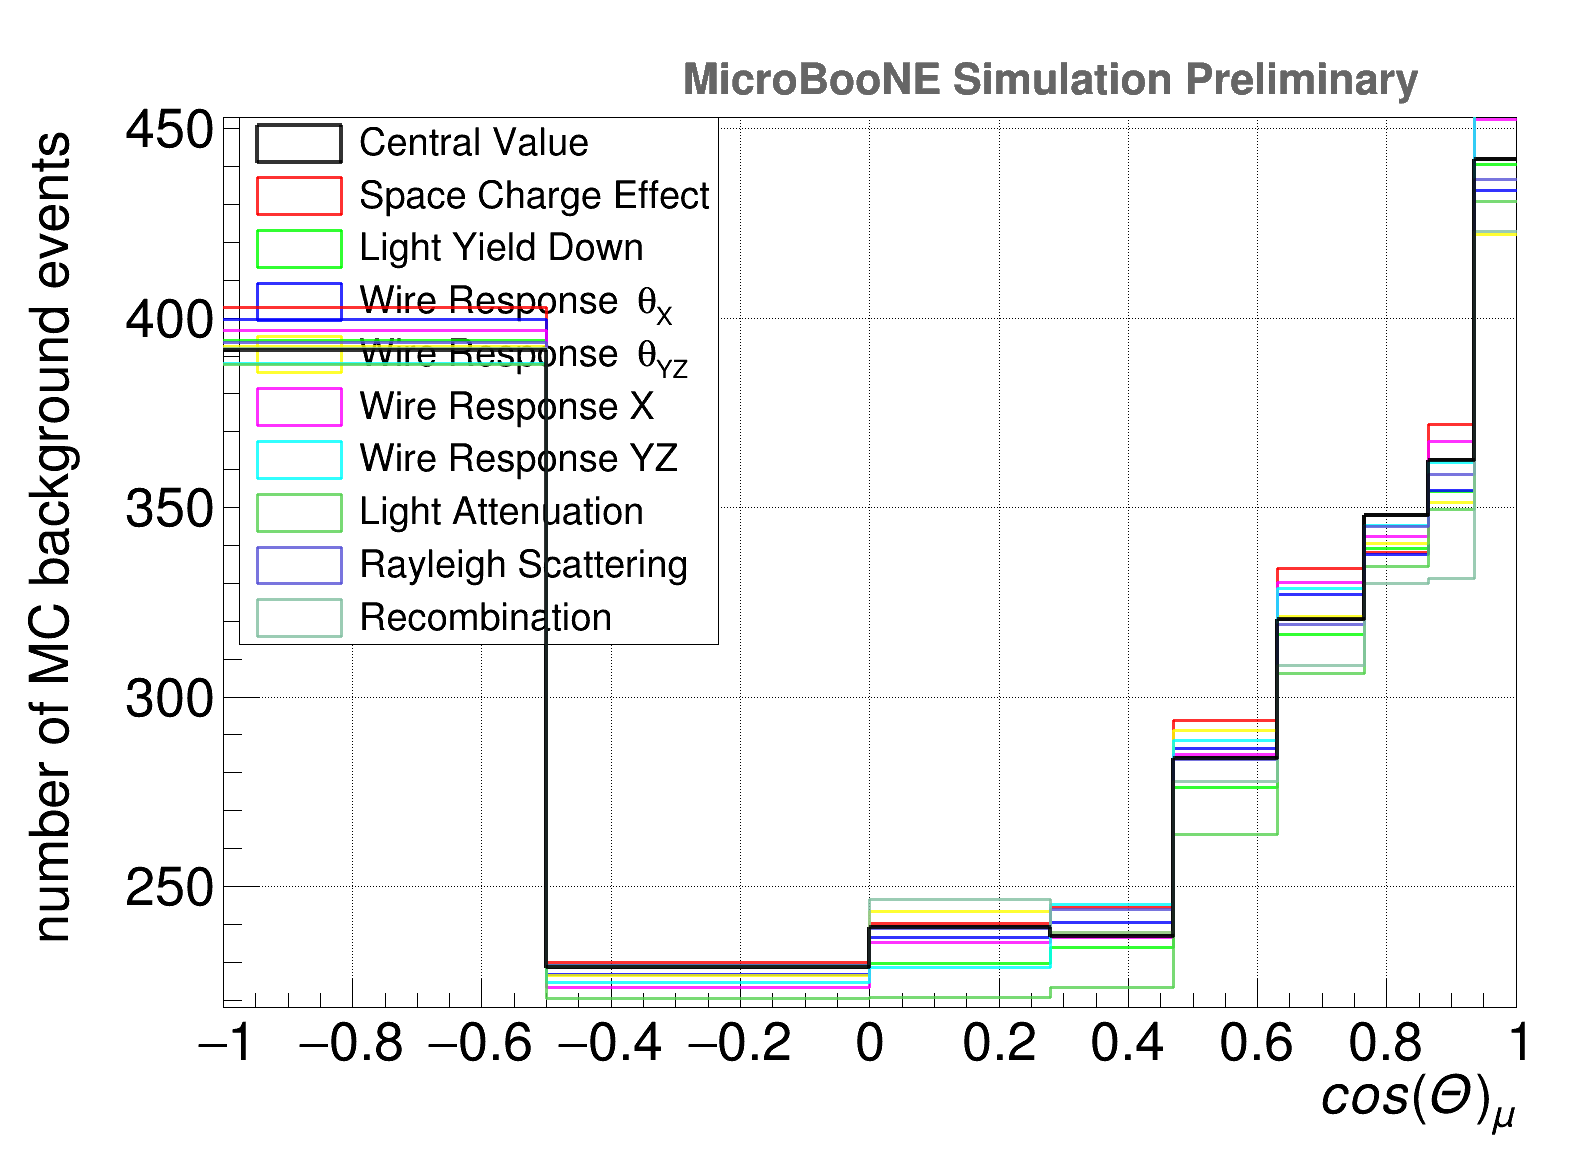

In [55]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
del h_files[:]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.45,0.95,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_tmp = x.Get('h_overlay_theta')
    h_files.append(h_tmp.Clone())
    #h_files.append(x.Get('h_overlay_theta'))
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    h_files[i].SetLineWidth(3)
    h_files[i].Scale(1.0/0.0638845208392)

    #h_files[i].SetMaximum(1)
    #h_files[i].SetMinimum(0)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        #h_files[i].SetMaximum(70)
        h_files[i].SetYTitle("number of MC background events")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        #h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        legend.Draw()

        h_files[i].Draw('hist')
        legend.Draw()
    else:
        #h_files[i].SetMaximum(70)
        h_files[i].Draw("hist same")
        h_files[i].SetYTitle("number of MC background events")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        #h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
    i+=1
h_files[0].Draw("hist same")
#legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_overlay_theta_detsys.png")
c1.SaveAs(outputdir_pdf + "h_overlay_theta_detsys.pdf")
c1.SaveAs(outputdir_root + "h_overlay_theta_detsys.root")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_xsec_detsys_theta_stat.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_xsec_detsys_theta_stat.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_xsec_detsys_theta_stat.root has been created


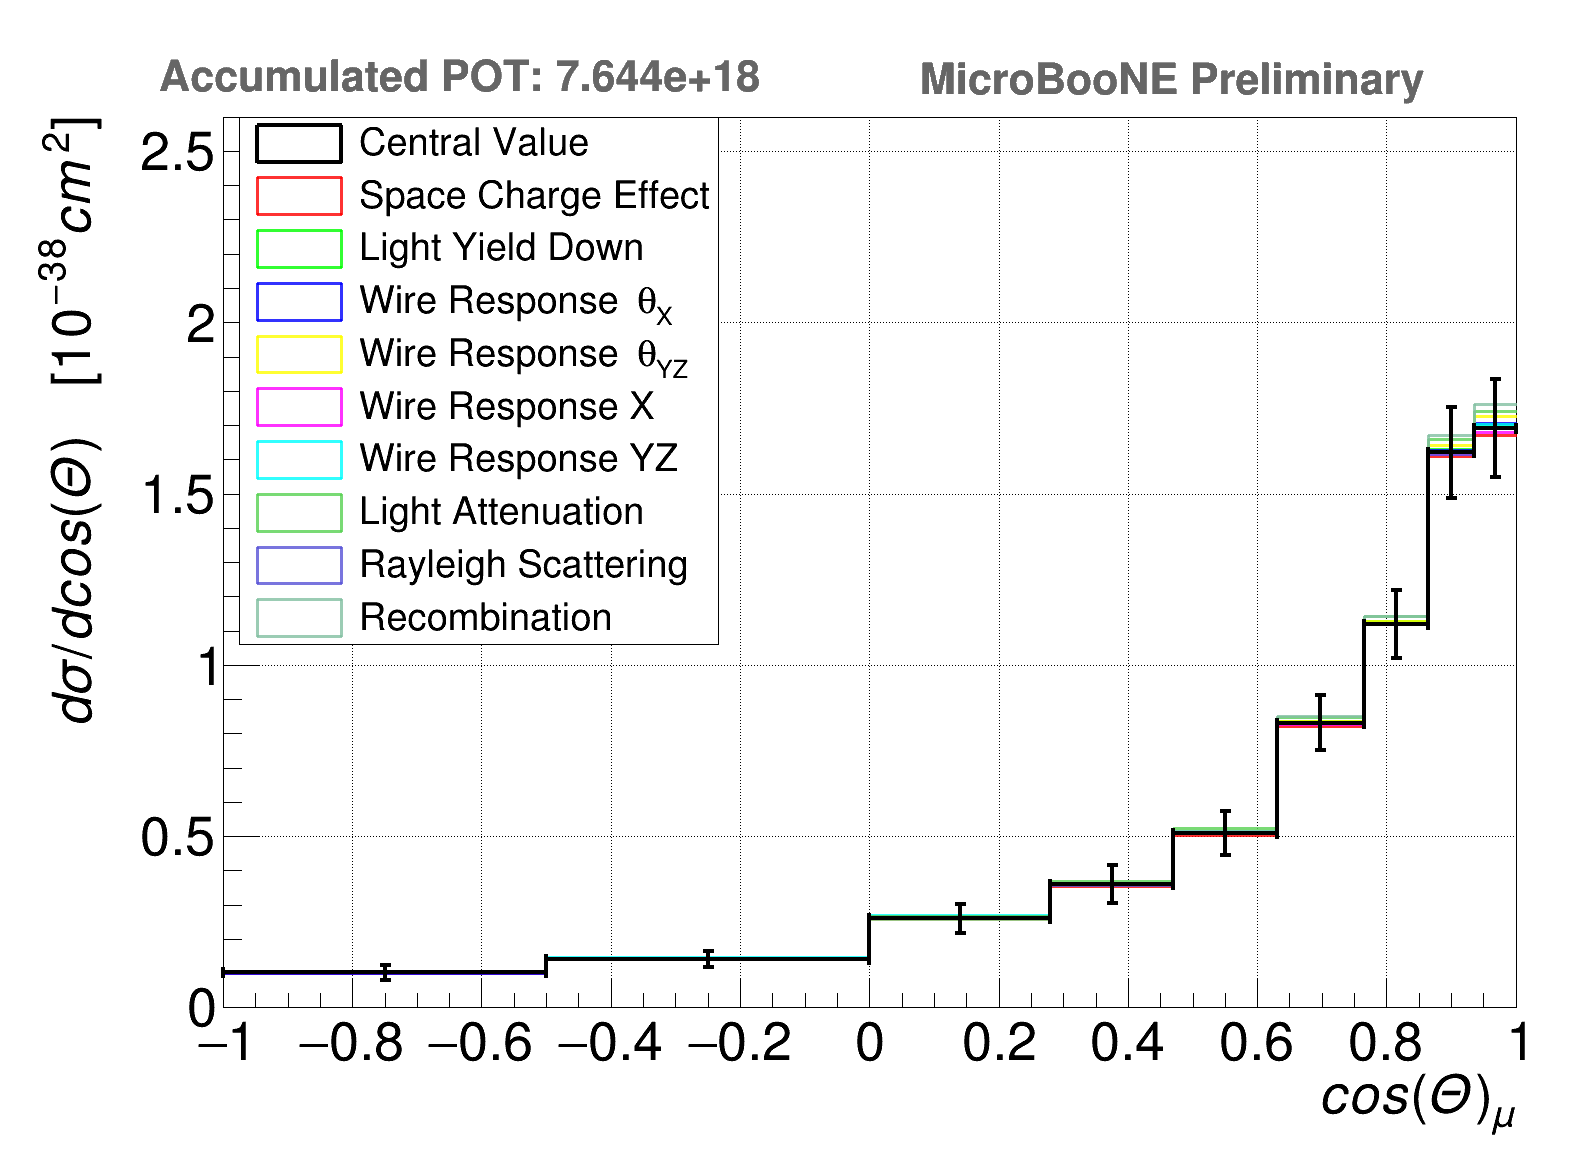

In [56]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_data_theta'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(2.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d cos(\Theta) \t [10^{-38} cm^{2}]")
    h_files[i].SetXTitle("cos(\Theta)_{\mu}")
    if i == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
#for i in range(1,h_files[0].GetNbinsX()+1):
#    h_files[0].SetBinError(i,h_files[0].GetBinError(i)+math.sqrt(h_covariance.GetBinContent(i,i)))
h_files[0].SetLineColor(ROOT.kBlack)
h_files[0].Draw("hist E1 same")
h_stat = h_files[0].Clone()
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_theta_stat.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_theta_stat.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_theta_stat.root")

#h_files.clear()

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_xsec_detsys_theta_all_wError.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_xsec_detsys_theta_all_wError.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_xsec_detsys_theta_all_wError.root has been created


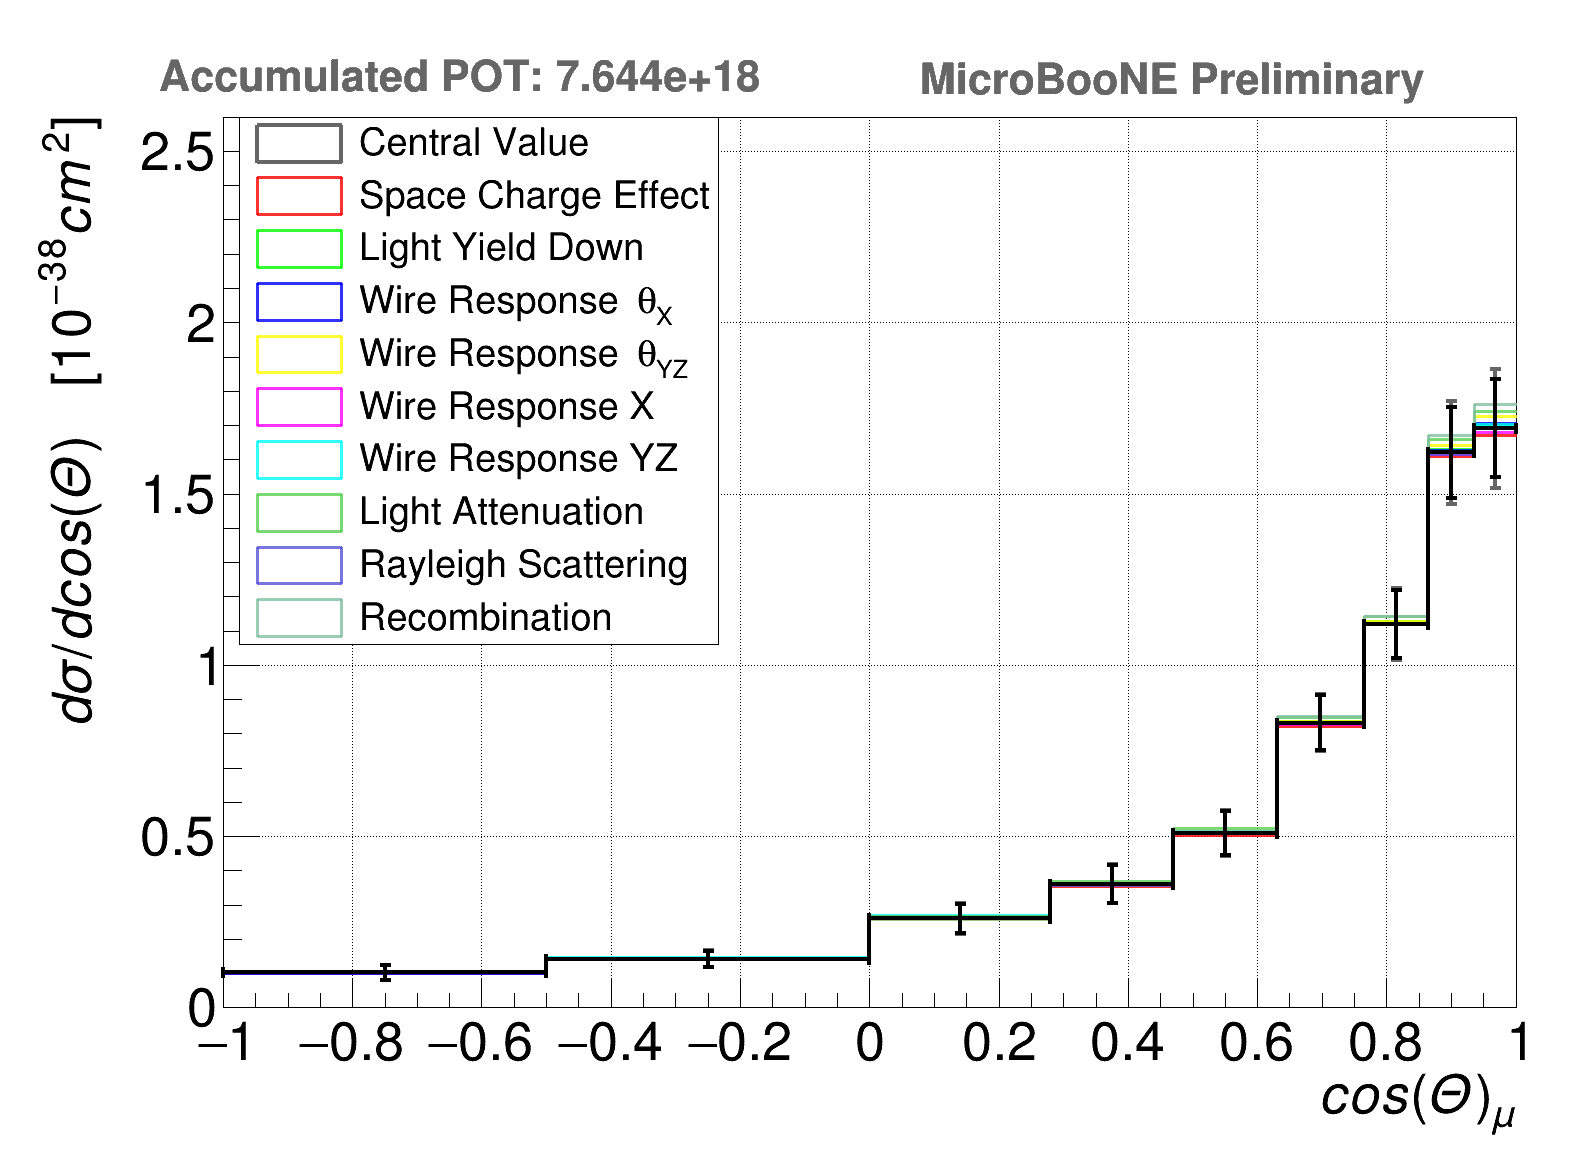

In [57]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_data_theta'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(2.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d cos(\Theta) \t [10^{-38} cm^{2}]")
    h_files[i].SetXTitle("cos(\Theta)_{\mu}")
    if i == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
for i in range(1,h_files[0].GetNbinsX()+1):
    #print h_files[0].GetBinError(i)
    h_files[0].SetBinError(i,math.sqrt(math.pow(h_files[0].GetBinError(i),2)+h_covariance.GetBinContent(i,i)*1e76))
    #h_files[0].SetBinError(i,h_files[0].GetBinError(i)+math.sqrt(h_covariance.GetBinContent(i,i))*1e38)
h_files[0].SetLineColor(ROOT.kGray+2)
h_files[0].Draw("E1 same")
h_stat.SetLineColor(ROOT.kBlack)
h_stat.SetMarkerSize(0.9)
h_stat.Draw('hist E1 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_theta_all_wError.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_theta_all_wError.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_theta_all_wError.root")

#h_files.clear()

0.00307000272052
0.00618140912004
0.0143568749087
0.00994732627854
0.0182316302688
0.0279890470973
0.0375795482078
0.0693464975958
0.0995592015495


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_xsec_detsys_theta_errdetsys_only.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_xsec_detsys_theta_errdetsys_only.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_xsec_detsys_theta_errdetsys_only.root has been created


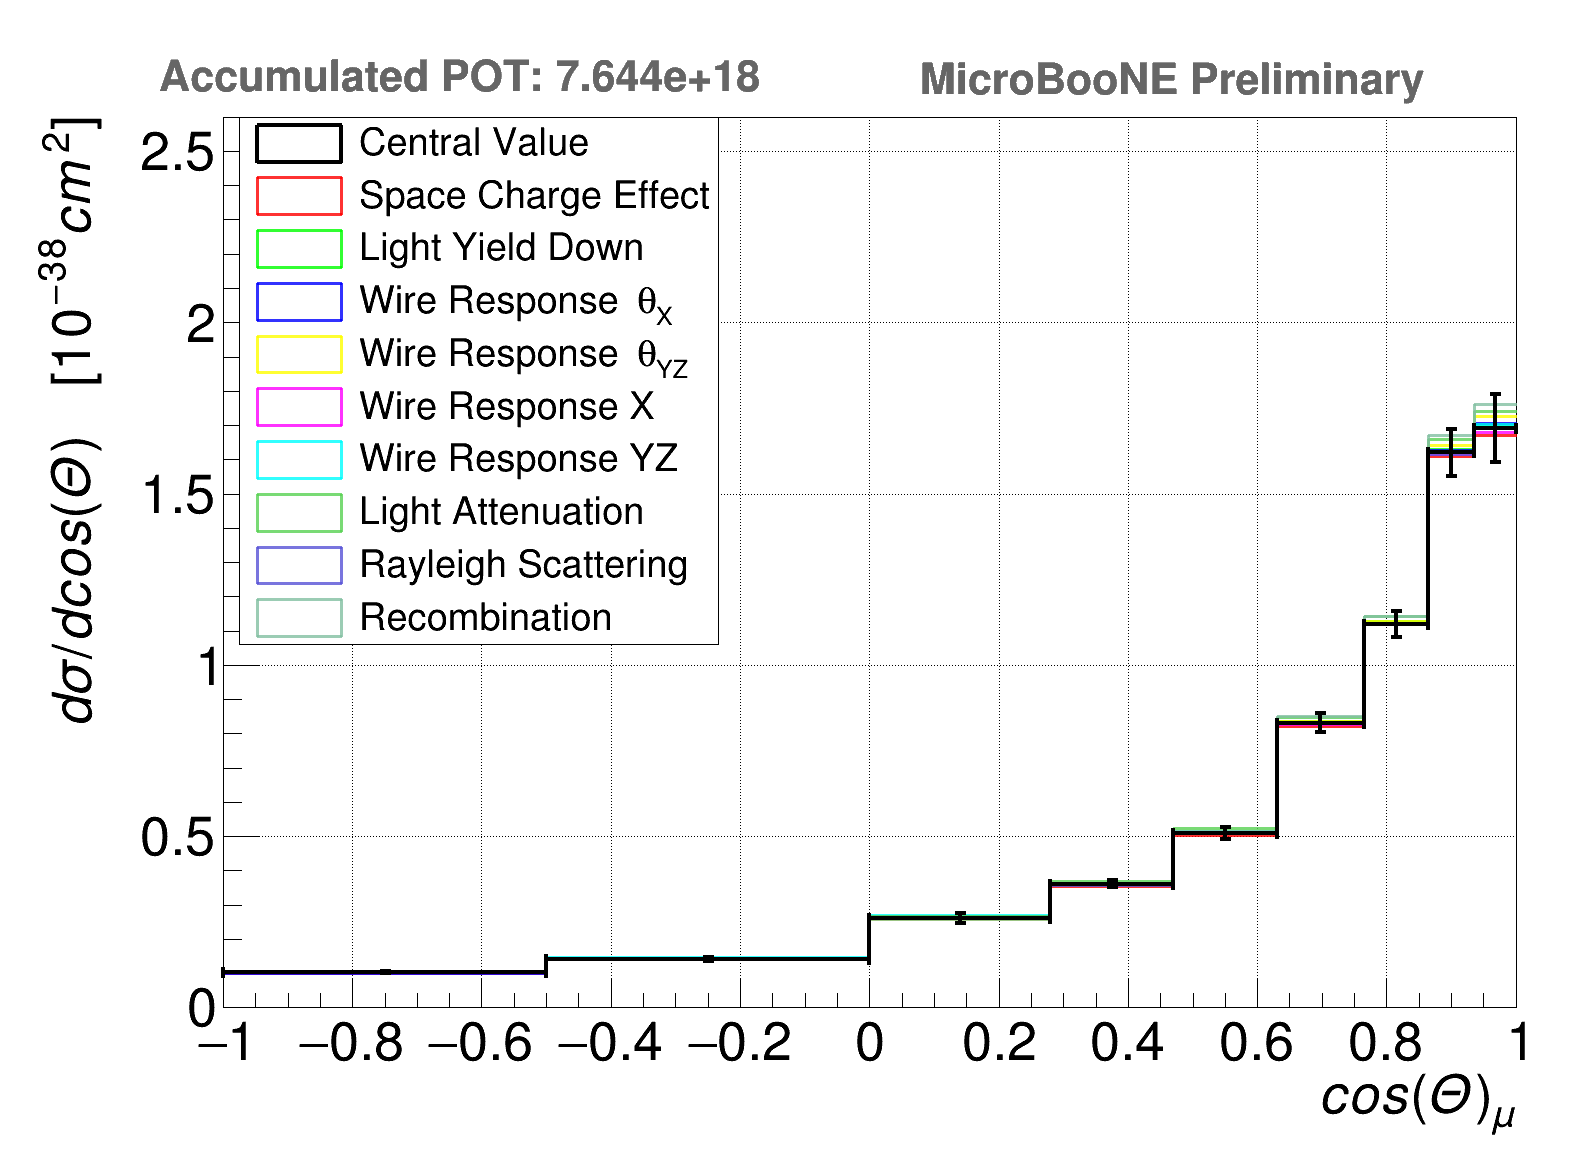

In [58]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_data_theta'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(2.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d cos(\Theta) \t [10^{-38} cm^{2}]")
    h_files[i].SetXTitle("cos(\Theta)_{\mu}")
    if i == 0:
        for j in range(1,h_files[0].GetNbinsX()+1):
            h_files[0].SetBinError(j,math.sqrt(h_covariance.GetBinContent(j,j)*1e76))
            print h_files[0].GetBinError(j)
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('E1')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
h_files[0].SetLineColor(ROOT.kBlack)
h_files[0].Draw("E1 hist same")
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_theta_errdetsys_only.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_theta_errdetsys_only.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_theta_errdetsys_only.root")

#h_files.clear()

0.00307000272052
0.00618140912004
0.0143568749087
0.00994732627854
0.0182316302688
0.0279890470973
0.0375795482078
0.0693464975958
0.0995592015495


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/png/h_xsec_detsys_theta_errdetsys_ratio.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/pdf/h_xsec_detsys_theta_errdetsys_ratio.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_extra/root/h_xsec_detsys_theta_errdetsys_ratio.root has been created


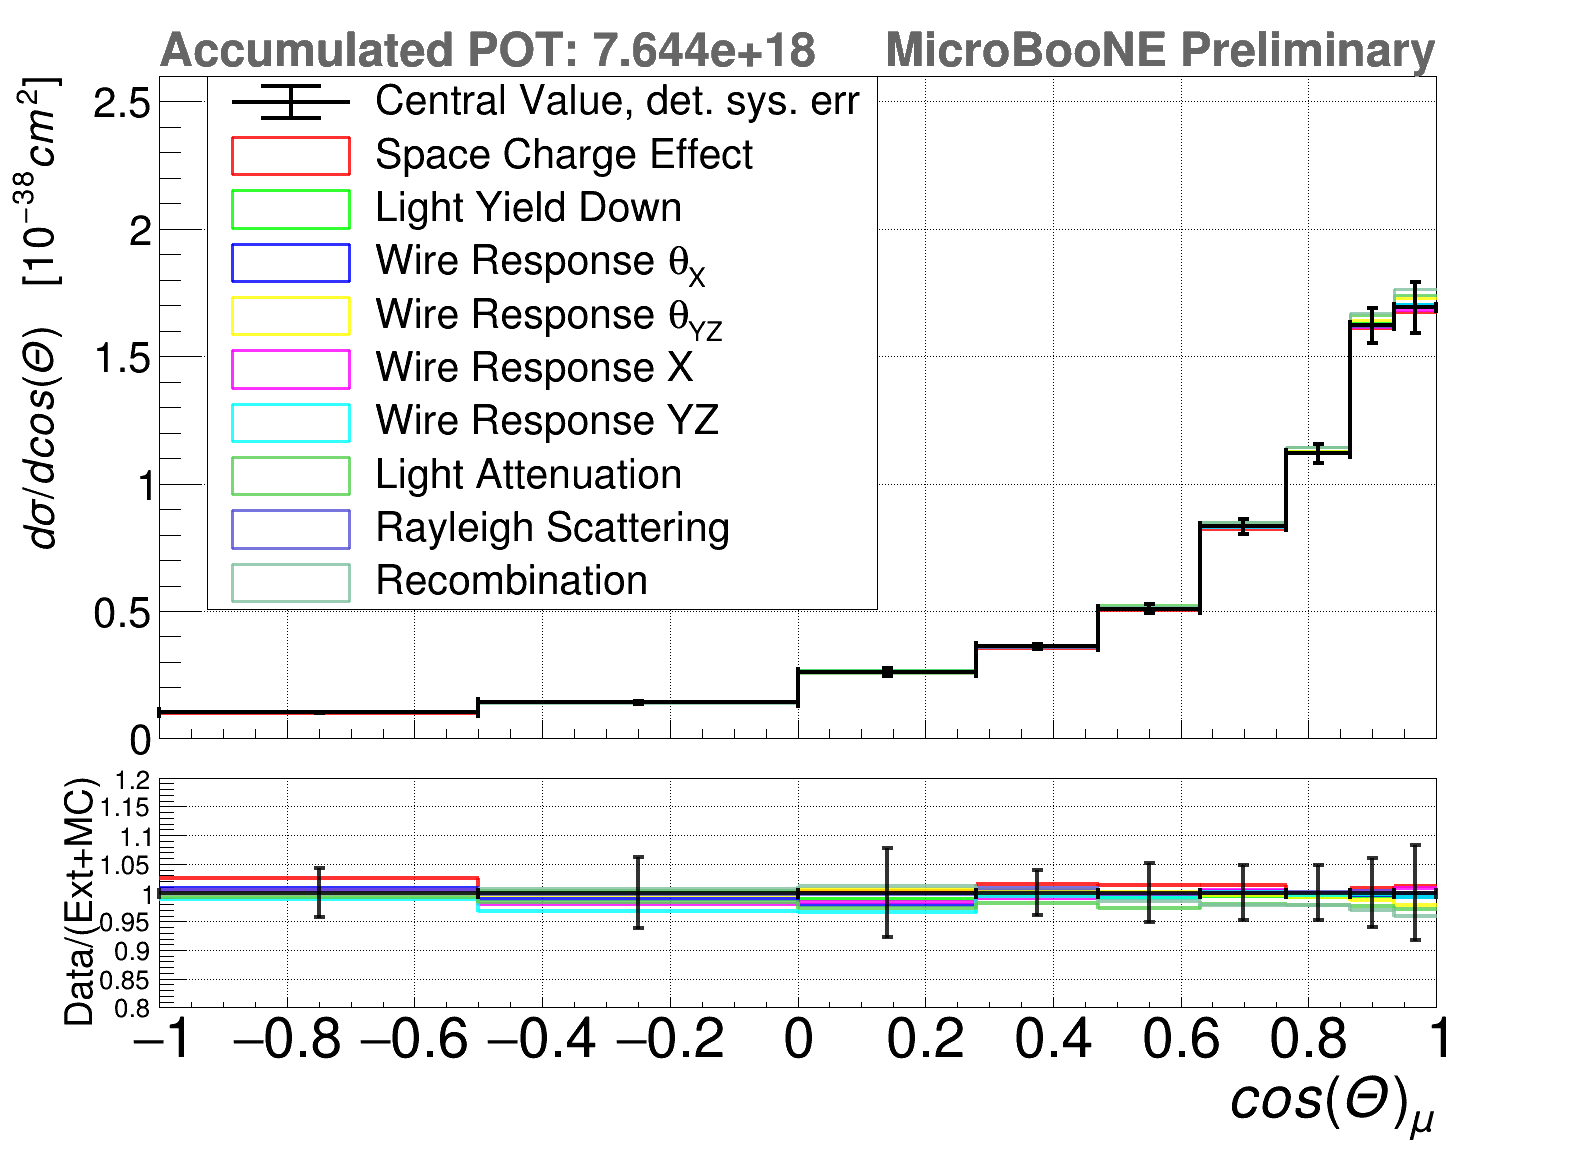

In [59]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.45,0.95,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.13,0.2,0.55,0.9); #LEGEND LEFT
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

for x in files:
    h_files.append(x.Get('h_xsec_data_theta'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(2.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    if i ==0:
        legend.AddEntry(h_files[i],'Central Value, det. sys. err',"lep")
    else:
        legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d cos(\Theta) \t [10^{-38} cm^{2}]")
    h_files[i].SetXTitle("cos(\Theta)_{\mu}")
    if i == 0:
        for j in range(1,h_files[0].GetNbinsX()+1):
            h_files[0].SetBinError(j,math.sqrt(h_covariance.GetBinContent(j,j)*1e76))
            print h_files[0].GetBinError(j)
        h_files[i].GetYaxis().SetLabelSize(0.06);
        h_files[i].GetYaxis().SetTitleSize(0.06);
        h_files[i].GetYaxis().SetTitleOffset(0.8);
        h_files[i].GetXaxis().SetLabelOffset(999);
        h_files[i].GetXaxis().SetTitleOffset(999);
        h_files[i].GetXaxis().SetLabelSize(0);
        h_files[i].GetXaxis().SetTitleSize(0);
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('E1')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
h_files[0].SetLineColor(ROOT.kBlack)
h_files[0].Draw("E1 hist same")
legend.Draw()
prelim, pot_tex = draw_adding_ratio()
prelim.Draw()
pot_tex.Draw()

c1.cd()
h_files[0].GetXaxis().SetLabelOffset(0);
h_files[0].GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
h_files2 = []
for i,x in enumerate(files):
    h_files2.append(h_files[0].Clone())
    h_files2[i].Divide(h_files[i])
    h_files2[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files2[i].SetLineColorAlpha(30,0.8)
    if i ==0 :
        h_files2[i].SetYTitle('Data/(Ext+MC)')
        h_files2[i].GetYaxis().SetTitleSize(0.1)
        h_files2[i].GetYaxis().SetTitleOffset(0.3)
        h_files2[i].GetYaxis().SetLabelSize(0.07)

        h_files2[i].GetXaxis().SetTitleSize(0.15)
        h_files2[i].GetXaxis().SetLabelSize(0.15)
        h_files2[i].GetXaxis().SetTitleOffset(1)
        h_files2[i].SetMinimum(0.8)
        h_files2[i].SetMaximum(1.2)
        h_files2[i].Draw('hist')
    else:
        h_files2[i].Draw('hist same')

h_files2[0].Draw('E1 same')
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_theta_errdetsys_ratio.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_theta_errdetsys_ratio.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_theta_errdetsys_ratio.root")

#h_files.clear()

In [60]:
sefsefg

NameError: name 'sefsefg' is not defined

In [ ]:
RootFile_theta.Close()

In [ ]:
# only ststematic error
h_cv.SetLineWidth(3)
h_cv.SetMaximum(1.6)
h_cv.SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_cv.SetXTitle("p_{\mu} [GeV]")
h_cv.Draw('HIST')
legend = ROOT.TLegend(0.55,0.45,0.9,0.9); #LEGEND RIGHT
legend.AddEntry(h_cv,'CV sys. err.',"f")
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
for para in range(num_para):
    for uni in range(1):        
        h_1d_xsec[para][uni].Draw('HIST same ')
        h_1d_xsec[para][uni].SetMaximum(1.6)
        #print h_1d_xsec[para][uni].GetBinContent(3),' - ', h_1d_bkg[para][uni].GetBinContent(3)
    legend.AddEntry(h_1d_xsec[para][uni],weight_list_flux[para],"f")
legend.Draw()
for i in range(binnum):
    h_cv.SetBinError(i+1,math.sqrt(xsec_cov_matrix[i][i])*1e38)
    print h_cv.GetBinContent(i+1), h_cv.GetBinError(i+1)
h_cv.Draw('HIST E1 same')
c1.Draw()
c1.SaveAs(outputdir_png + "h_1d_xsec_genie_other_sys.png")
c1.SaveAs(outputdir_root + "h_1d_xsec_genie_other_sys.root")
c1.SaveAs(outputdir_pdf + "h_1d_xsec_genie_other_sys.pdf")
